In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# Load the dataset
data = pd.read_csv("/Users/bhanuprasadthota/Downloads/economic-indicators.csv")  

In [3]:
# Data Cleaning 
# Display basic information about the dataset
print("Original Dataset Info:")
print(data.info())

Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            84 non-null     int64  
 1   Month                           84 non-null     int64  
 2   logan_passengers                84 non-null     int64  
 3   logan_intl_flights              84 non-null     int64  
 4   hotel_occup_rate                84 non-null     float64
 5   hotel_avg_daily_rate            84 non-null     float64
 6   total_jobs                      84 non-null     int64  
 7   unemp_rate                      84 non-null     float64
 8   labor_force_part_rate           84 non-null     float64
 9   pipeline_unit                   84 non-null     int64  
 10  pipeline_total_dev_cost         84 non-null     float64
 11  pipeline_sqft                   84 non-null     int64  
 12  pipeline_const_

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Year                              0
Month                             0
logan_passengers                  0
logan_intl_flights                0
hotel_occup_rate                  0
hotel_avg_daily_rate              0
total_jobs                        0
unemp_rate                        0
labor_force_part_rate             0
pipeline_unit                     0
pipeline_total_dev_cost           0
pipeline_sqft                     0
pipeline_const_jobs               0
foreclosure_pet                   0
foreclosure_deeds                 0
med_housing_price                 0
housing_sales_vol                 0
new_housing_const_permits         0
new-affordable_housing_permits    0
dtype: int64


In [5]:
# Handle missing values (fill with mean or median)
data.fillna(data.mean(), inplace=True)

In [6]:
# Display cleaned dataset info
print("\nCleaned Dataset Info:")
print(data.info())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            84 non-null     int64  
 1   Month                           84 non-null     int64  
 2   logan_passengers                84 non-null     int64  
 3   logan_intl_flights              84 non-null     int64  
 4   hotel_occup_rate                84 non-null     float64
 5   hotel_avg_daily_rate            84 non-null     float64
 6   total_jobs                      84 non-null     int64  
 7   unemp_rate                      84 non-null     float64
 8   labor_force_part_rate           84 non-null     float64
 9   pipeline_unit                   84 non-null     int64  
 10  pipeline_total_dev_cost         84 non-null     float64
 11  pipeline_sqft                   84 non-null     int64  
 12  pipeline_const_

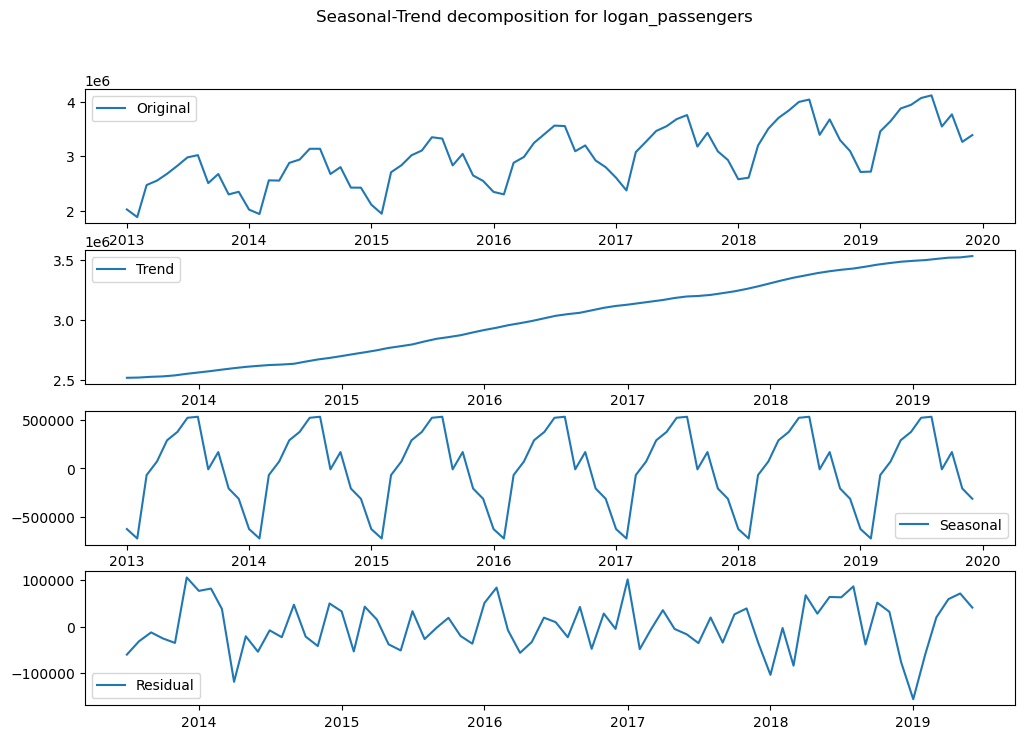

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/bhanuprasadthota/anaconda3/lib/python3.11/si

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

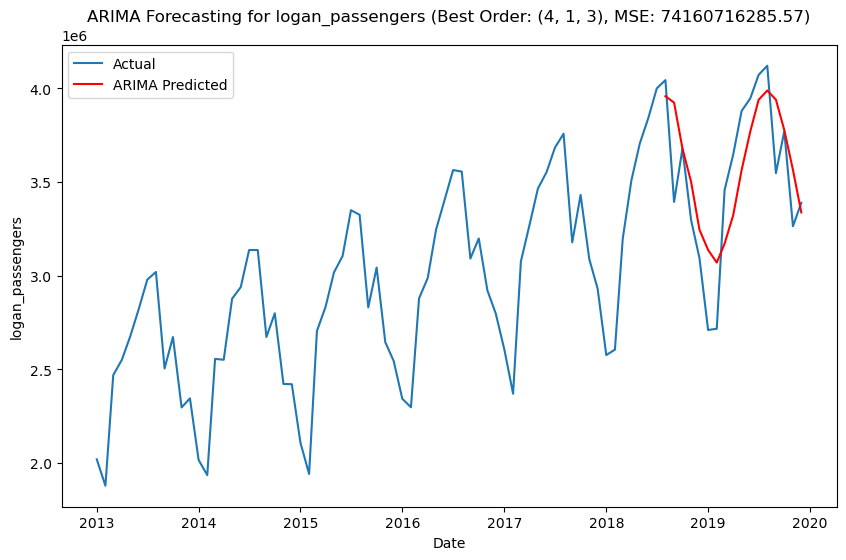

1/1 [==============================] - 0s 7ms/step
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.2697
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2282
Epoch 3/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1892
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1508
Epoch 5/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1131
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0786
Epoch 7/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0536
Epoch 8/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0491
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0701
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0831
Epoch 11/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0759
Epoch 12/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0616
Epoch 13/50
1/1 [=====

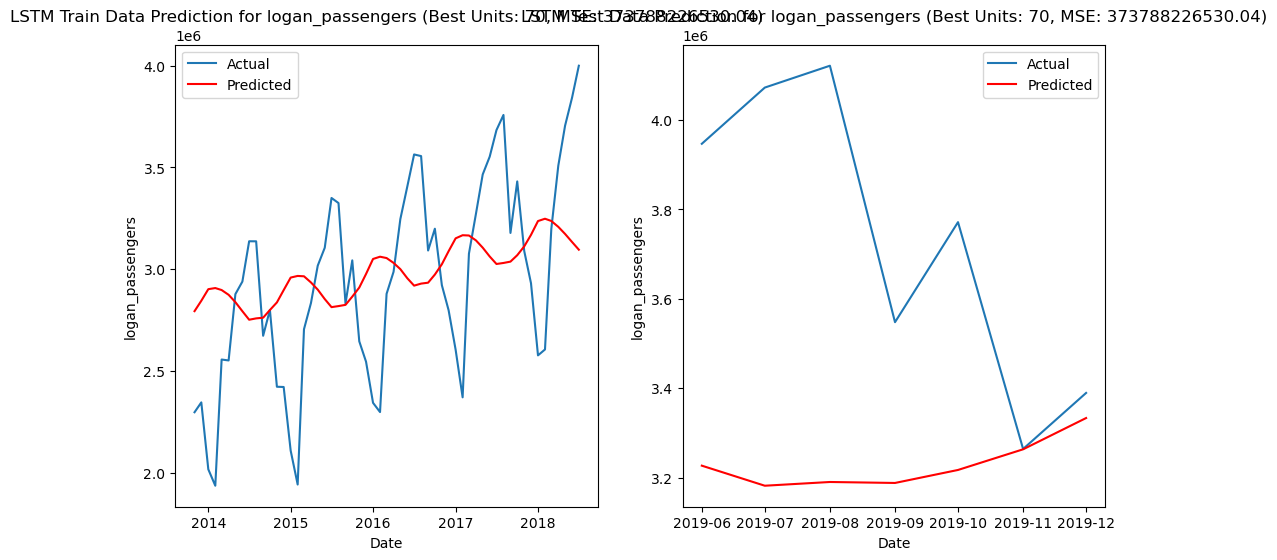

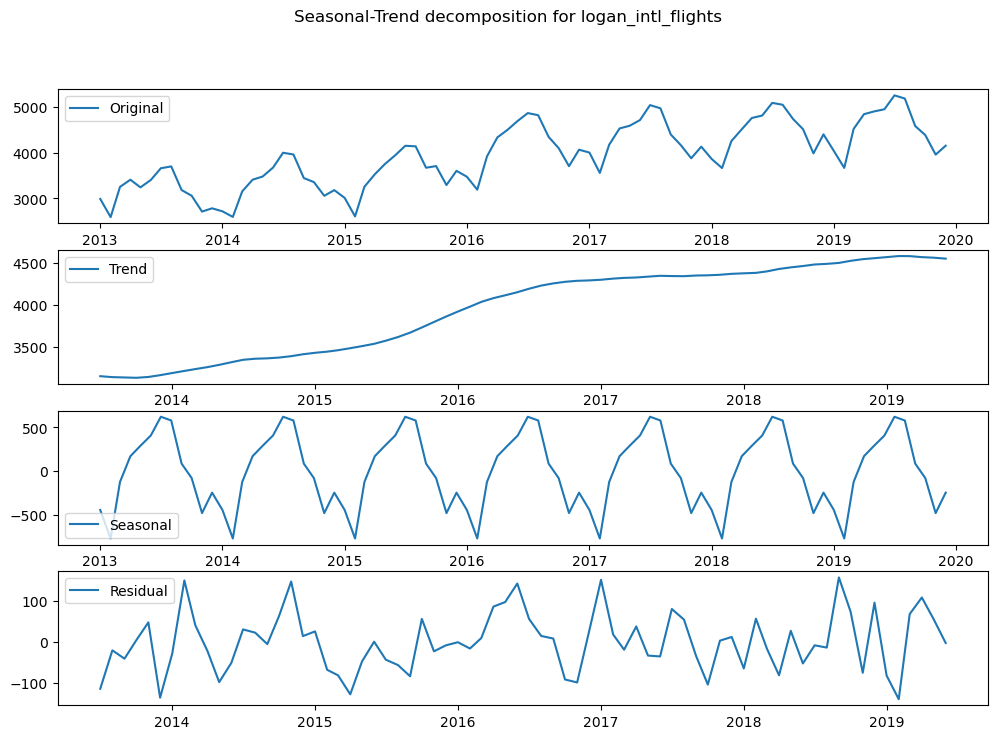

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ba

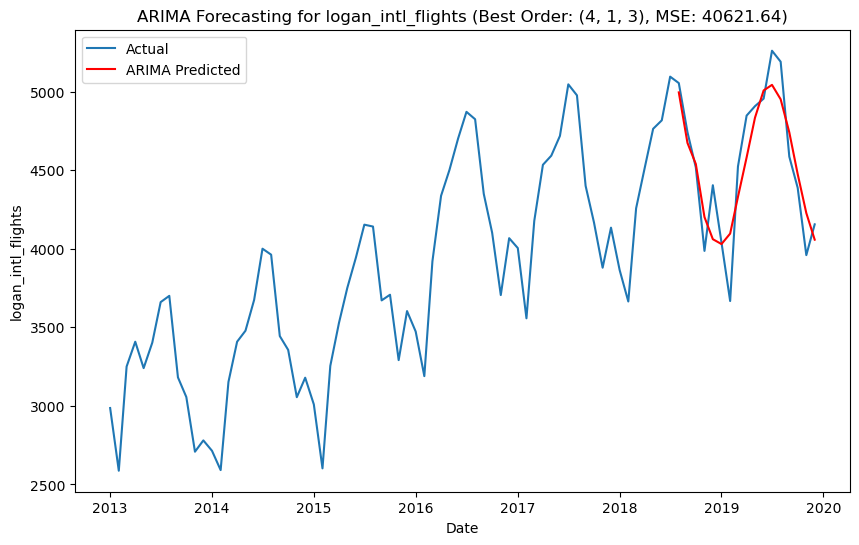

1/1 [==============================] - 0s 7ms/step
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.2954
Epoch 2/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2558
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 0.2183
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1808
Epoch 5/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1428
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1054
Epoch 7/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0717
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0485
Epoch 9/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0476
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0712
Epoch 11/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0836
Epoch 12/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0751
Epoch 13/50
1/1 [==

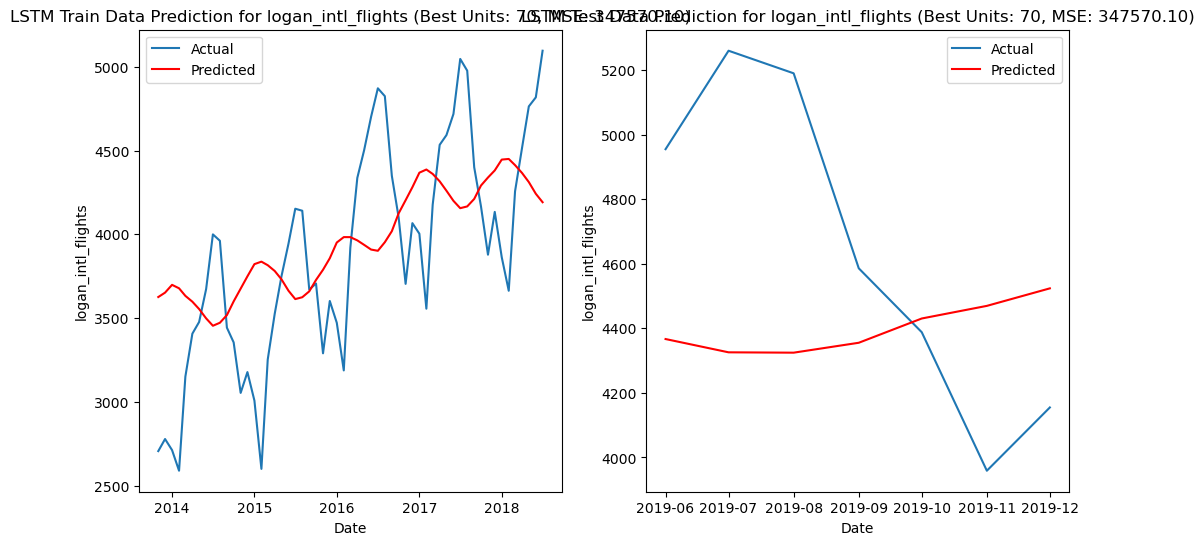

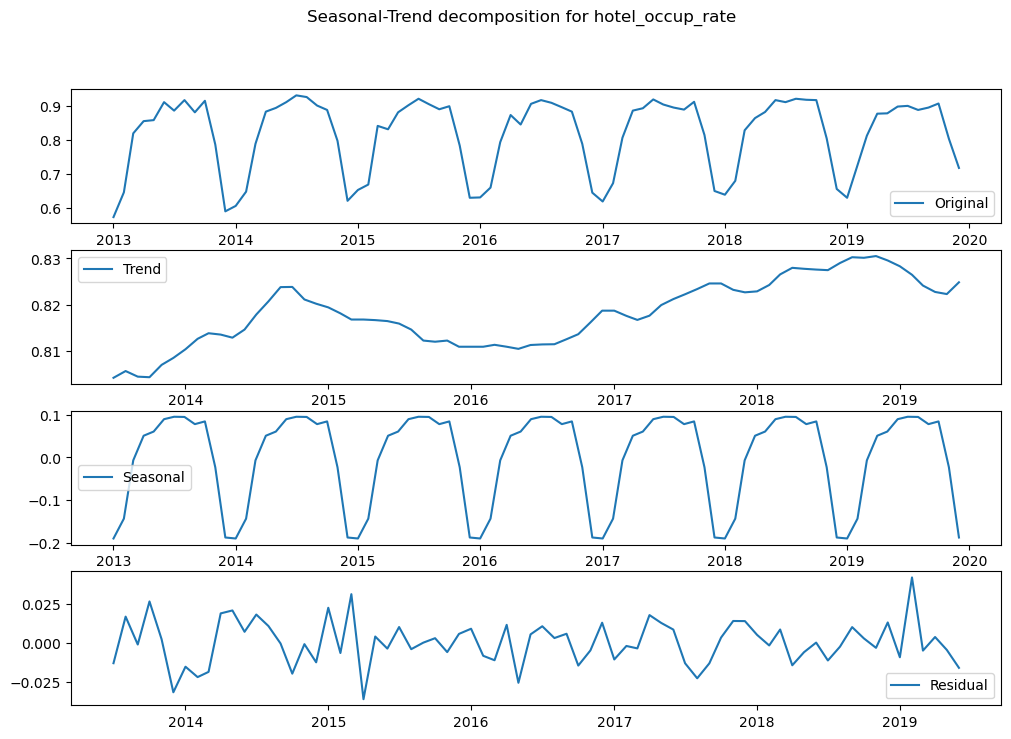

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

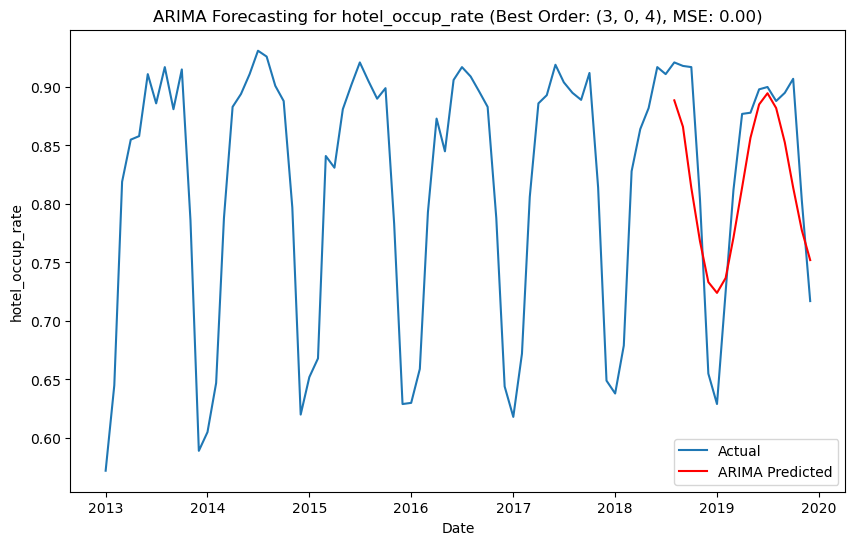

1/1 [==============================] - 0s 7ms/step
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.5769
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.5585
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: 0.5407
Epoch 4/50
1/1 [==============================] - 0s 6ms/step - loss: 0.5232
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.5062
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 0.4896
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 0.4733
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 0.4573
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.4416
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 0.4260
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - loss: 0.4107
Epoch 12/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3955
Epoch 13/50
1/1 [======

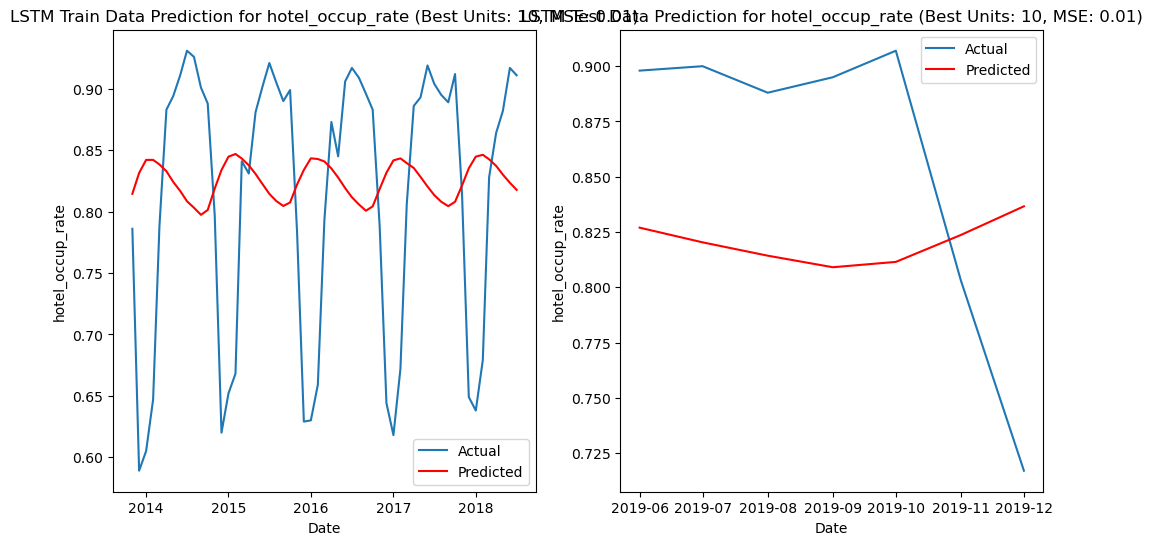

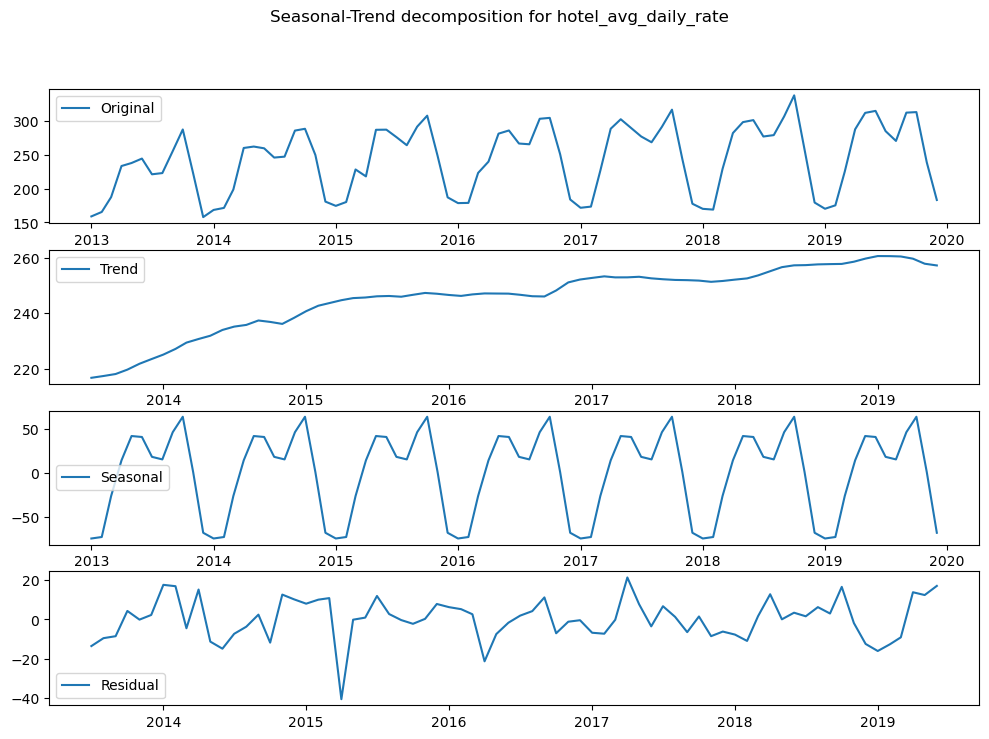

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/bhanuprasadthota/anaconda3/lib/python3.11/si

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

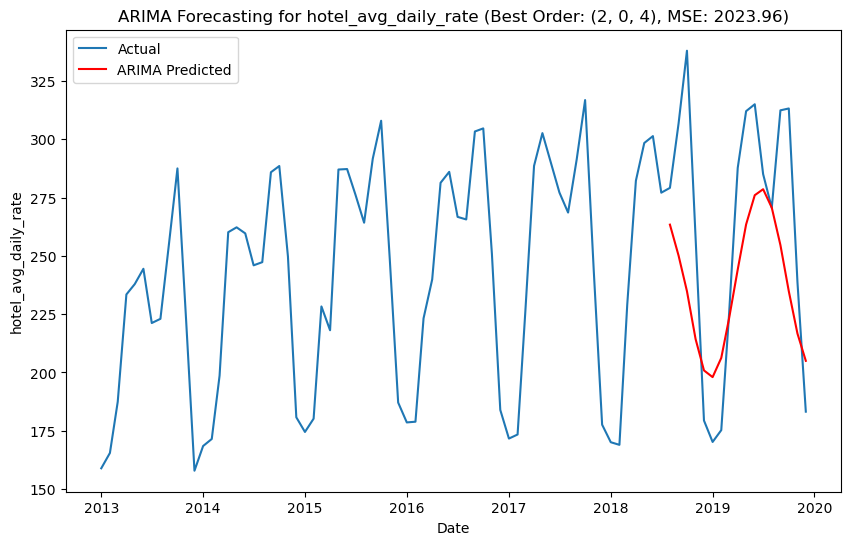

1/1 [==============================] - 0s 8ms/step
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.2945
Epoch 2/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2602
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 0.2263
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1914
Epoch 5/50
1/1 [==============================] - 0s 9ms/step - loss: 0.1557
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 0.1218
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0957
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0889
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 0.1084
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 0.1212
Epoch 11/50
1/1 [==============================] - 0s 11ms/step - loss: 0.1141
Epoch 12/50
1/1 [==============================] - 0s 11ms/step - loss: 0.1001
Epoch 13/50
1/1 [=

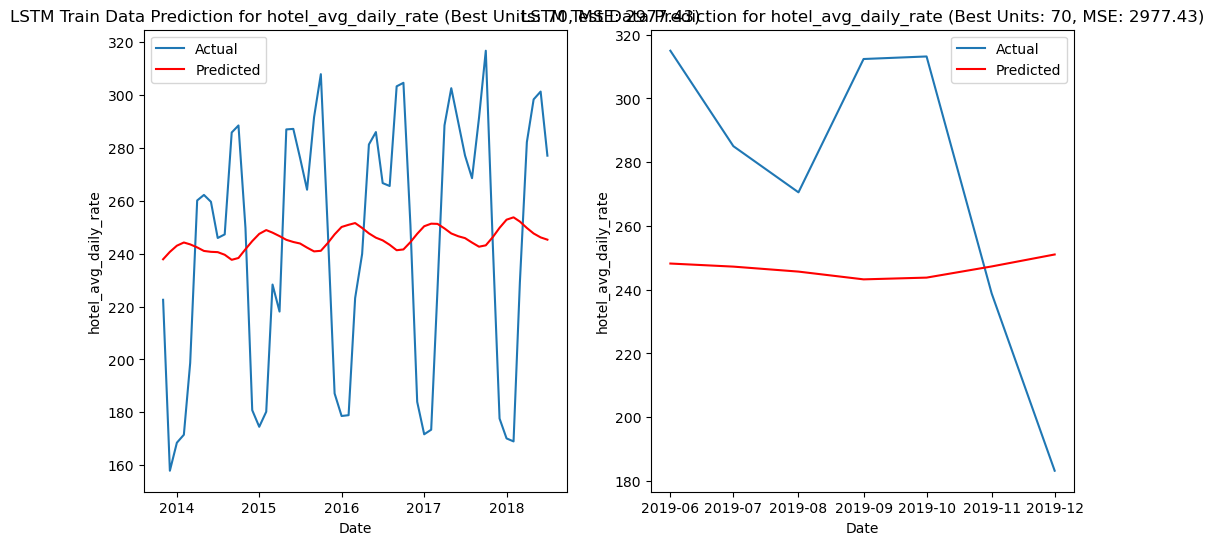

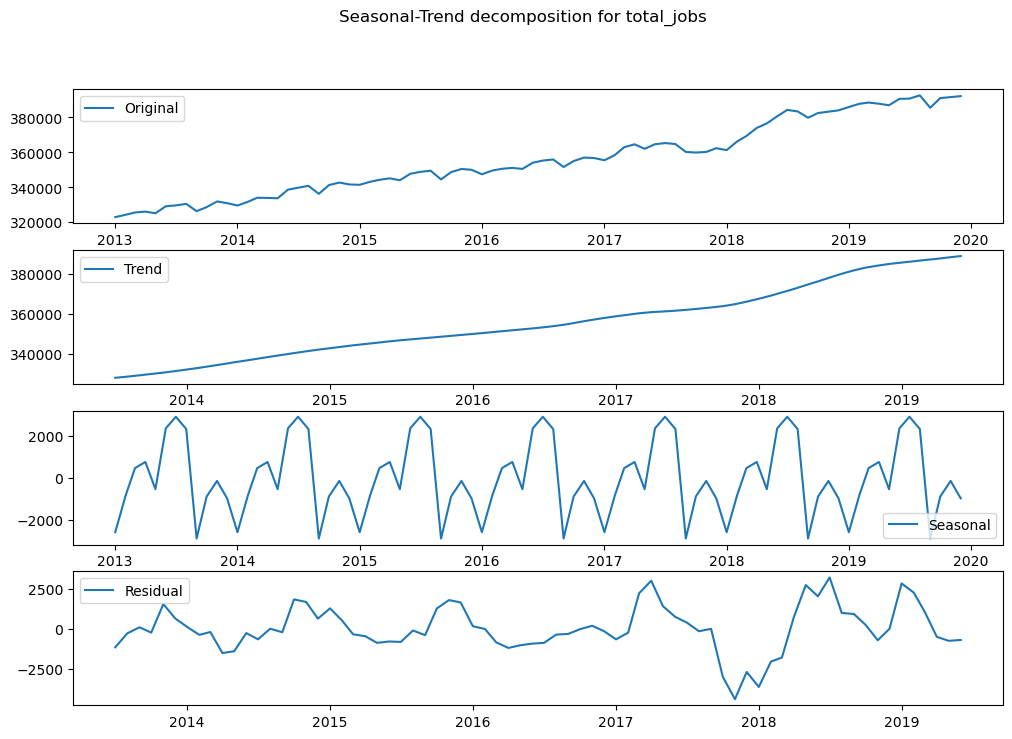

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/bhanuprasadthota/anaconda3/lib/python3.11/si

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ba

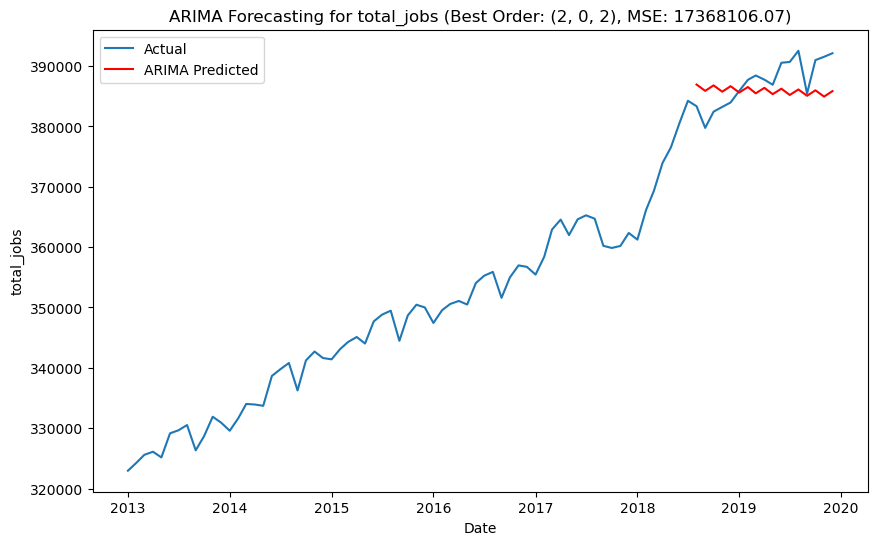

1/1 [==============================] - 0s 8ms/step
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.1959
Epoch 2/50
1/1 [==============================] - 0s 10ms/step - loss: 0.1648
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 0.1344
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 0.1035
Epoch 5/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0722
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0420
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0171
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 10/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0359
Epoch 11/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0346
Epoch 12/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0224
Epoch 13/50
1/1 [===

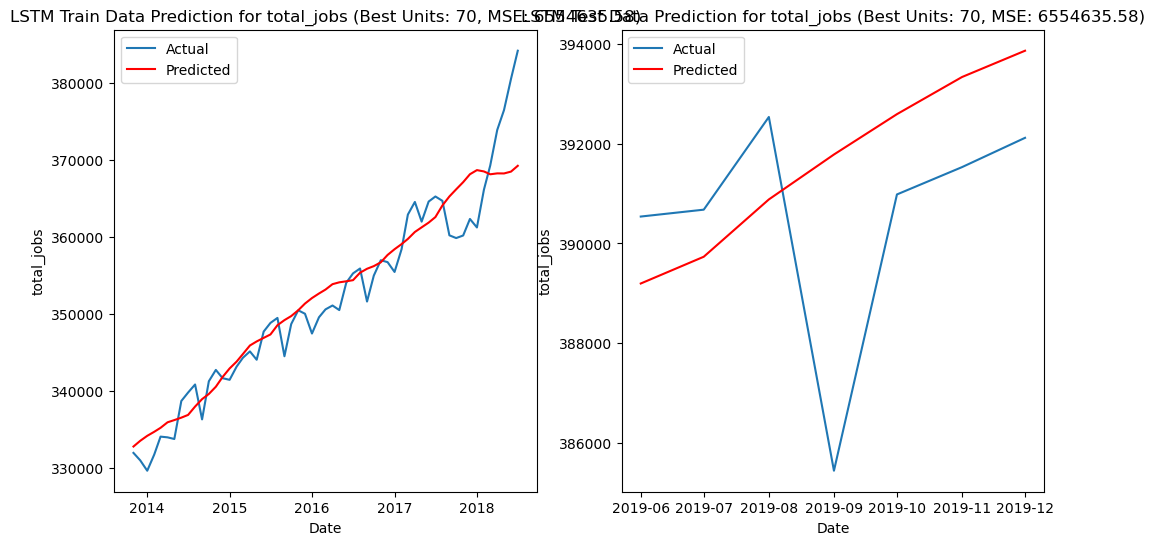

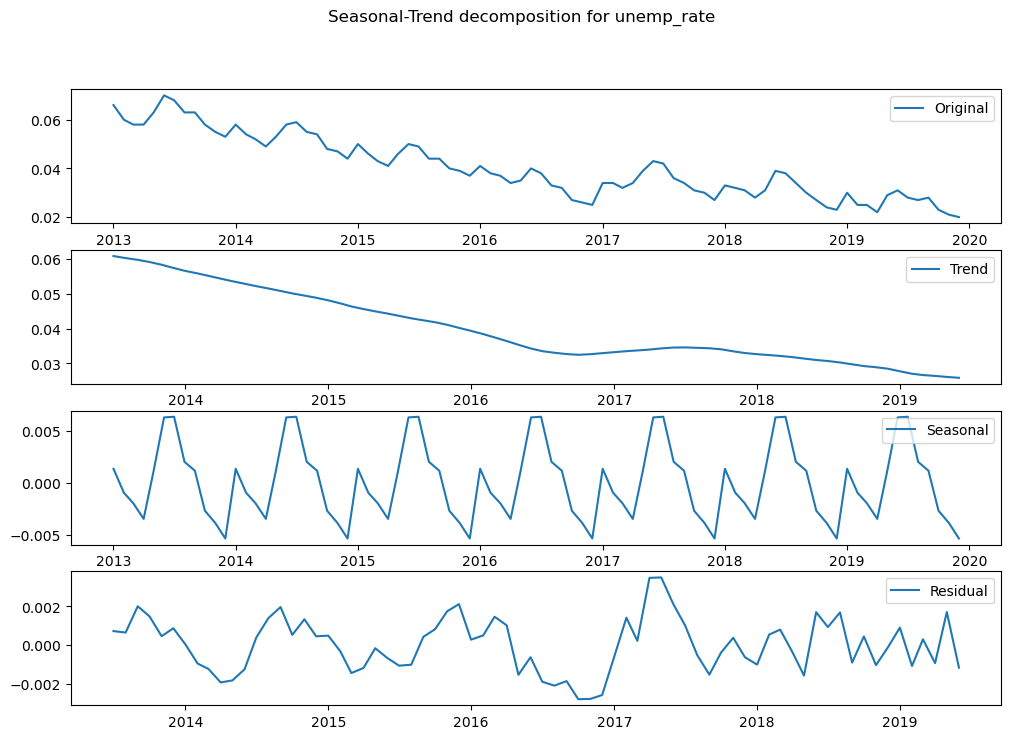

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/bhanuprasadthota/anaconda3/lib/python3.11/si

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/bhanuprasadthota/anaconda3/lib/python3.11/si

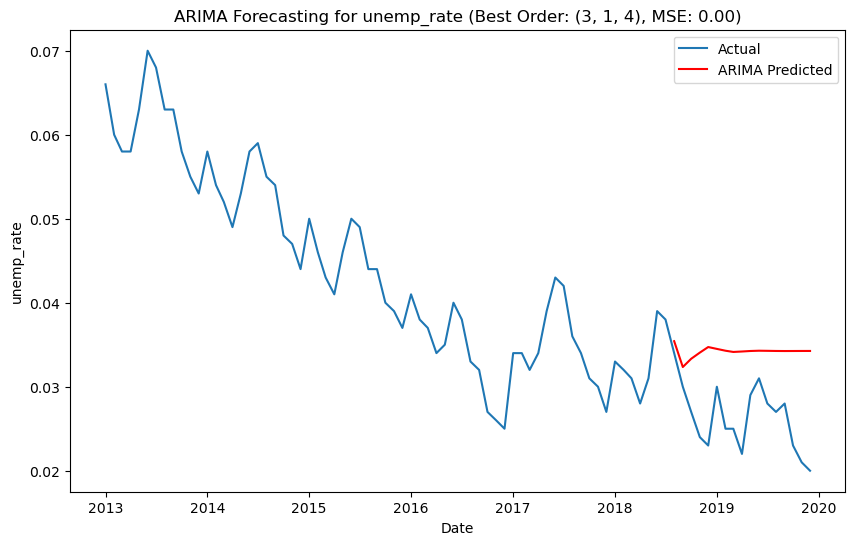

1/1 [==============================] - 0s 7ms/step
Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.2066
Epoch 2/50
1/1 [==============================] - 0s 13ms/step - loss: 0.1571
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 0.1125
Epoch 4/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0715
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0362
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0172
Epoch 8/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0394
Epoch 9/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0417
Epoch 10/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0288
Epoch 11/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0166
Epoch 12/50
1/1 [==============================] - 0s 18ms/step - loss: 0.0115
Epoch 13/50


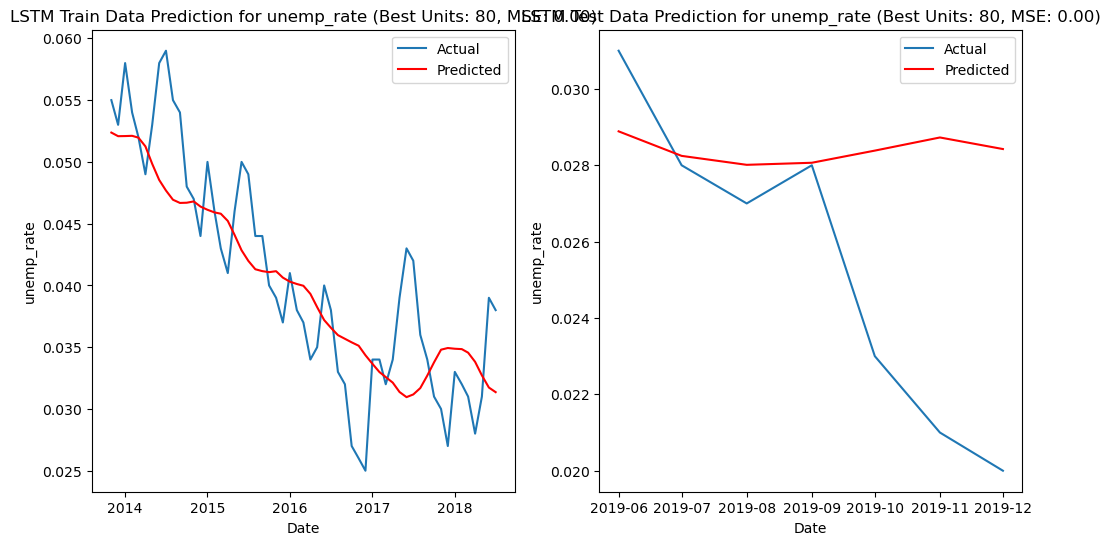

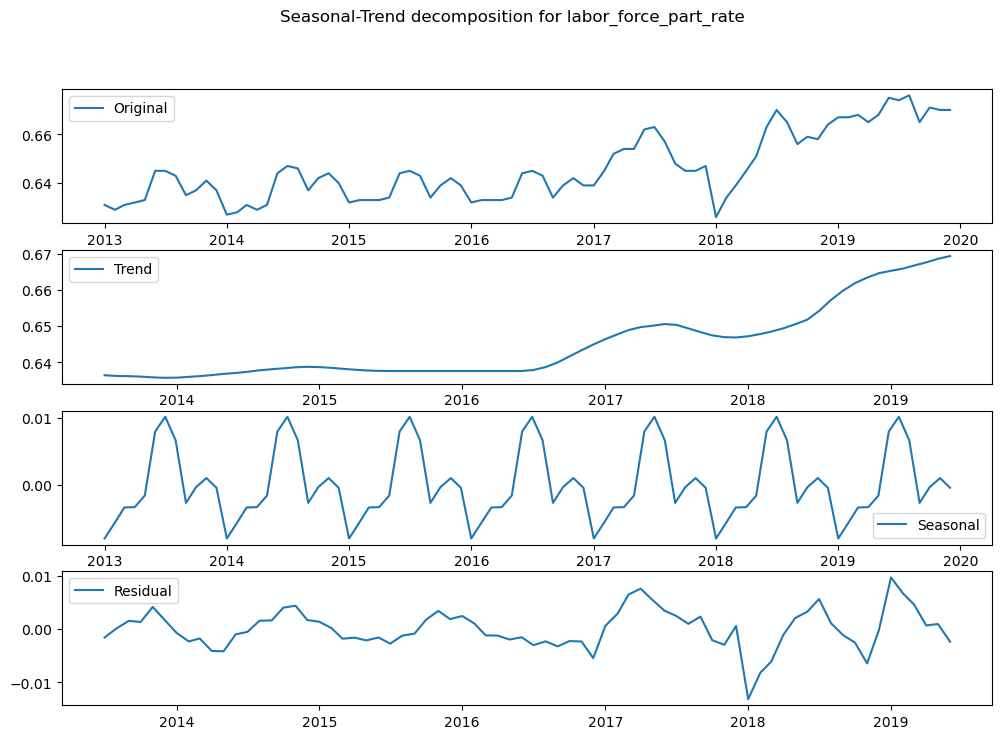

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ba

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/stats

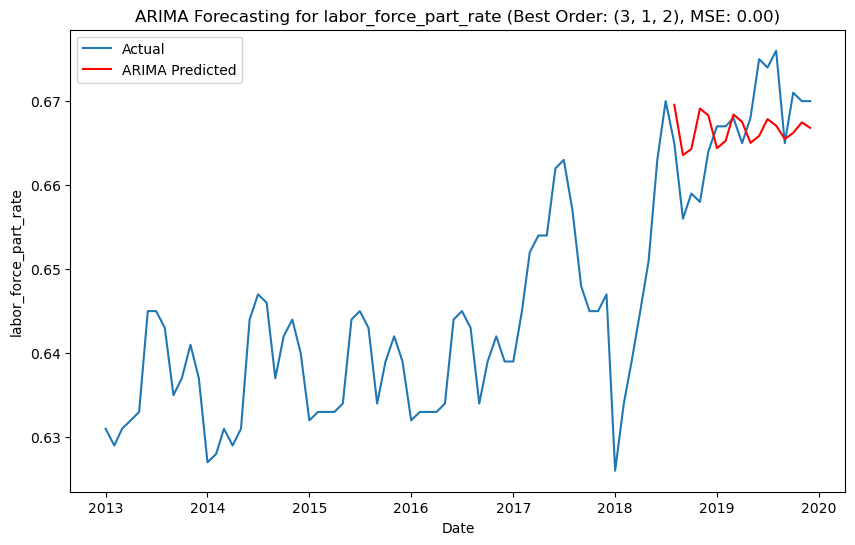

1/1 [==============================] - 0s 8ms/step
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.1349
Epoch 2/50
1/1 [==============================] - 0s 10ms/step - loss: 0.1134
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0937
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0748
Epoch 5/50
1/1 [==============================] - 0s 20ms/step - loss: 0.0570
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0427
Epoch 7/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0366
Epoch 8/50
1/1 [==============================] - 0s 13ms/step - loss: 0.0441
Epoch 9/50
1/1 [==============================] - 0s 14ms/step - loss: 0.0519
Epoch 10/50
1/1 [==============================] - 0s 13ms/step - loss: 0.0494
Epoch 11/50
1/1 [==============================] - 0s 17ms/step - loss: 0.0428
Epoch 12/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0378
Epoch 13/50
1/

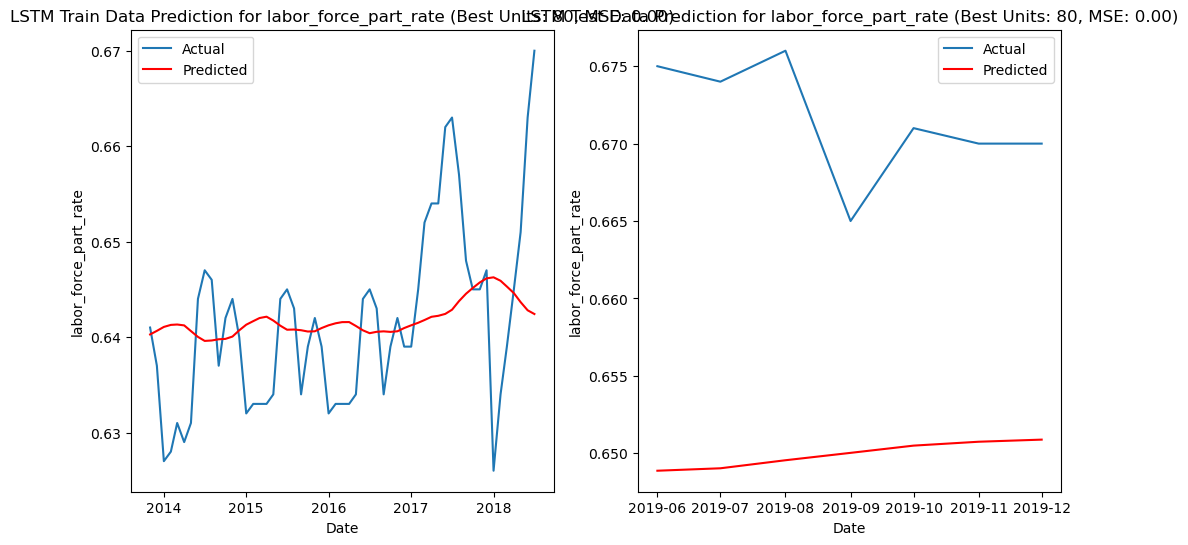

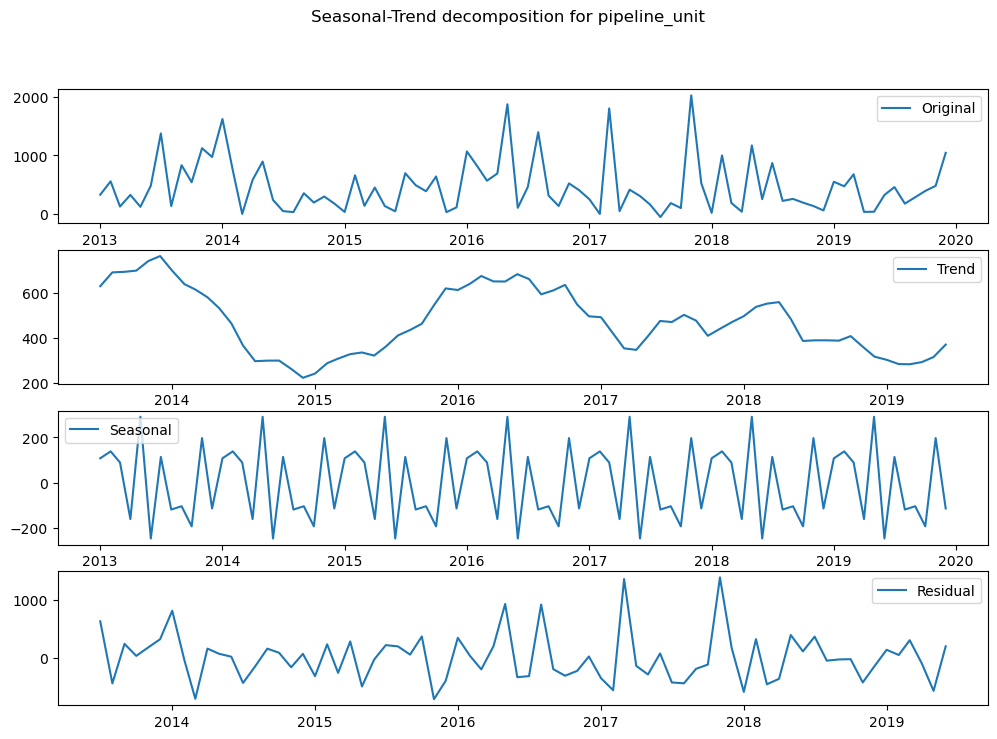

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/bhanuprasadthota/anaconda3/lib/python3.11/si

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

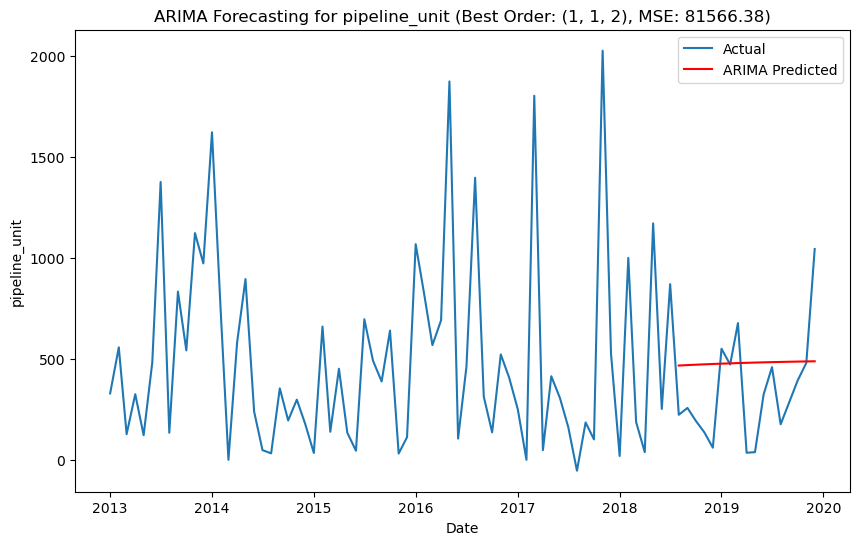

1/1 [==============================] - 0s 8ms/step
Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.1387
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1301
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 0.1221
Epoch 4/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1145
Epoch 5/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1073
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1005
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0940
Epoch 8/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0879
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0821
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0767
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0718
Epoch 12/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0676
Epoch 13/50
1/1 [======

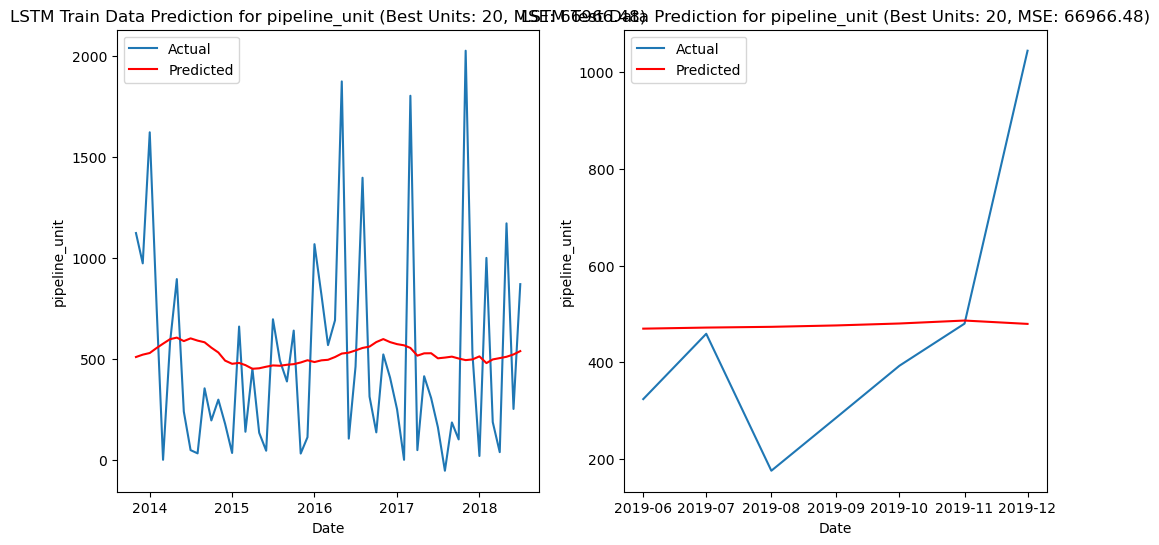

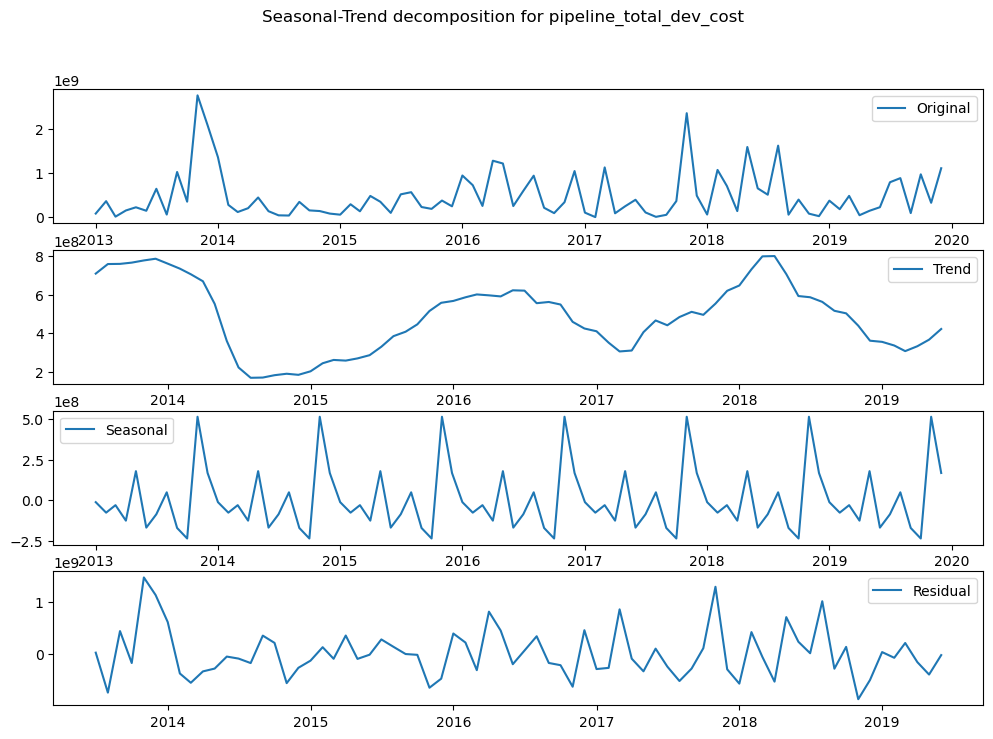

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ba

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


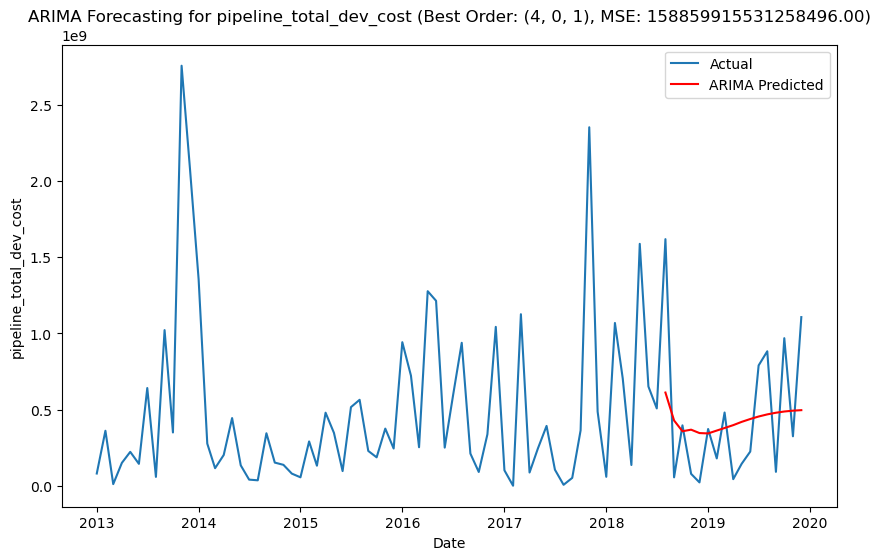

1/1 [==============================] - 0s 9ms/step
Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.0795
Epoch 2/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0695
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0606
Epoch 4/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0531
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0497
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0531
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0544
Epoch 8/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0519
Epoch 9/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0492
Epoch 10/50
1/1 [==============================] - 0s 13ms/step - loss: 0.0479
Epoch 11/50
1/1 [==============================] - 0s 15ms/step - loss: 0.0477
Epoch 12/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0480
Epoch 13/50


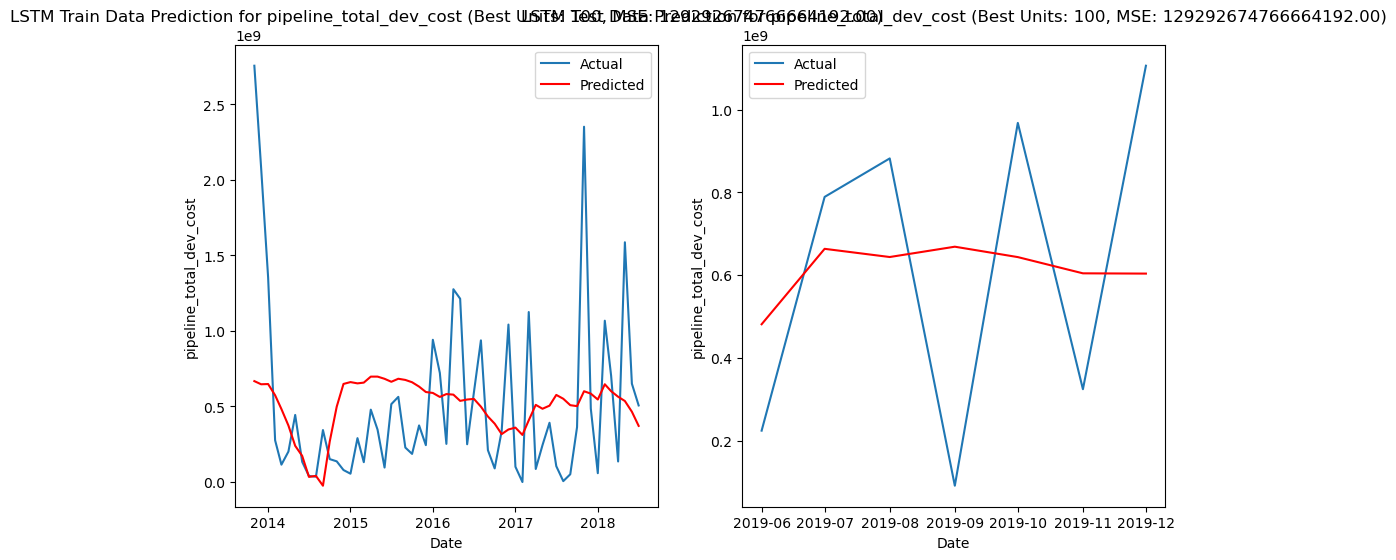

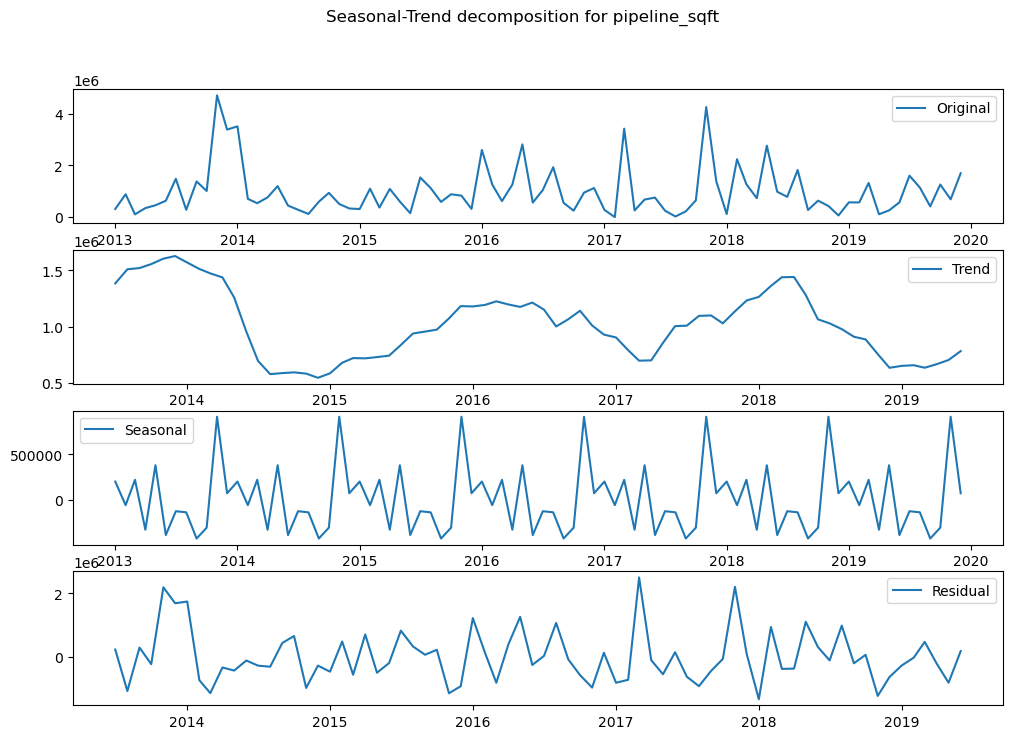

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/bhanuprasadthota/anaconda3/lib/python3.11/si

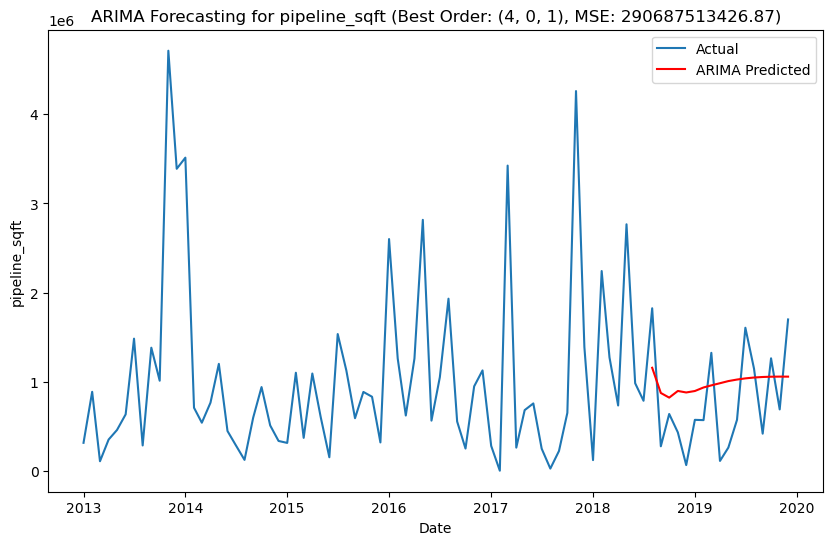

1/1 [==============================] - 0s 7ms/step
Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.1036
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0936
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0844
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0759
Epoch 5/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0682
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0618
Epoch 7/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0576
Epoch 8/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0567
Epoch 9/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0591
Epoch 10/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0619
Epoch 11/50
1/1 [==============================] - 0s 56ms/step - loss: 0.0623
Epoch 12/50
1/1 [==============================] - 0s 20ms/step - loss: 0.0608
Epoch 13/50
1/1 [====

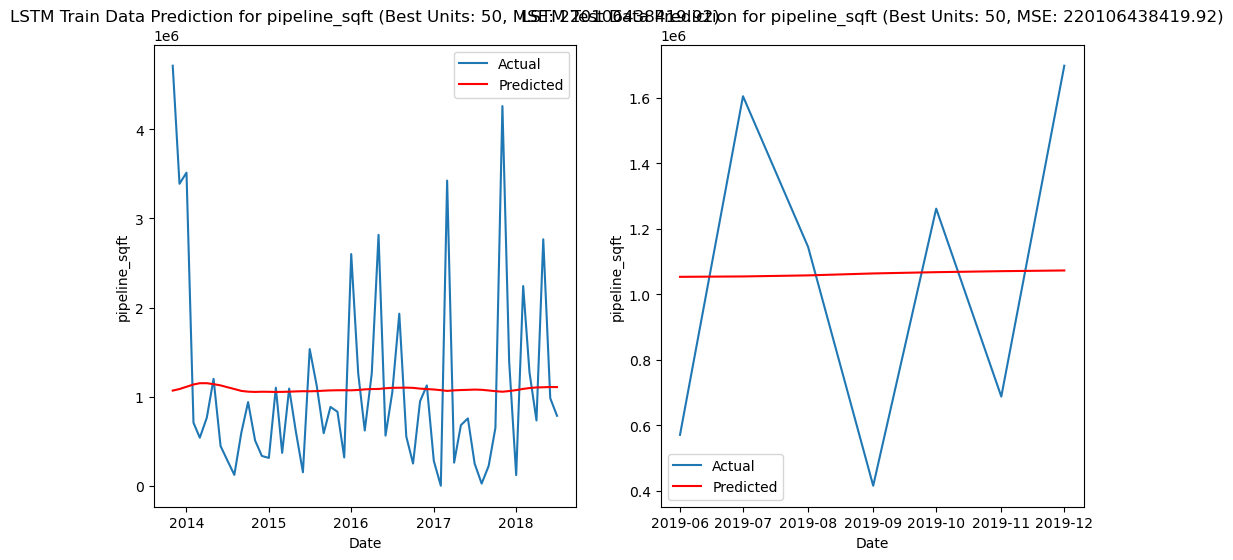

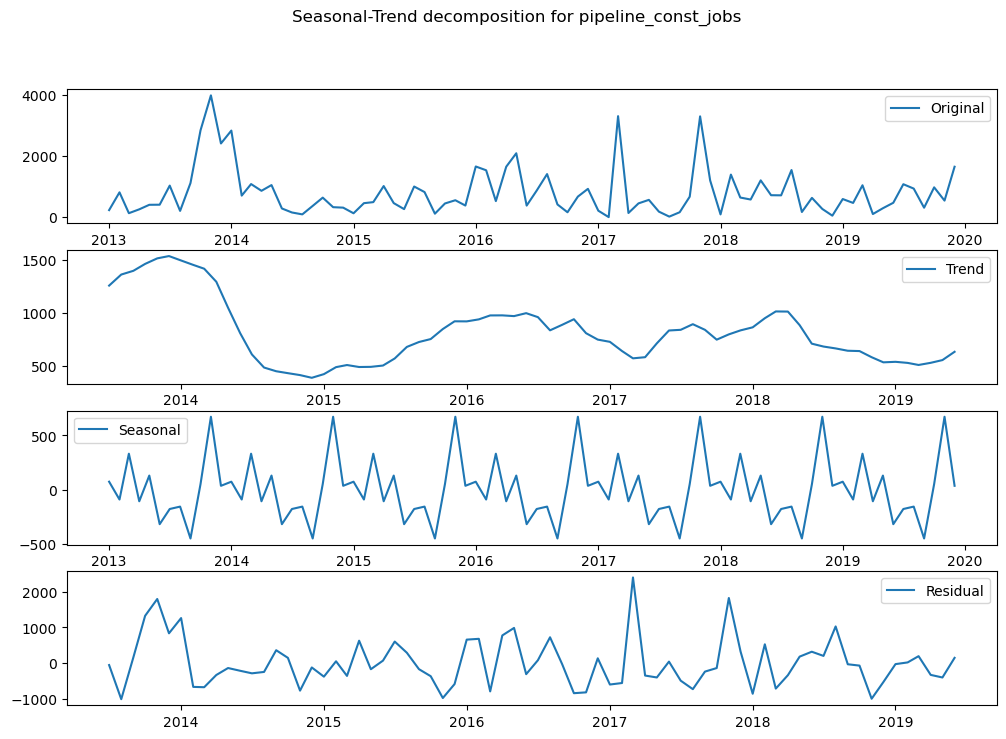

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

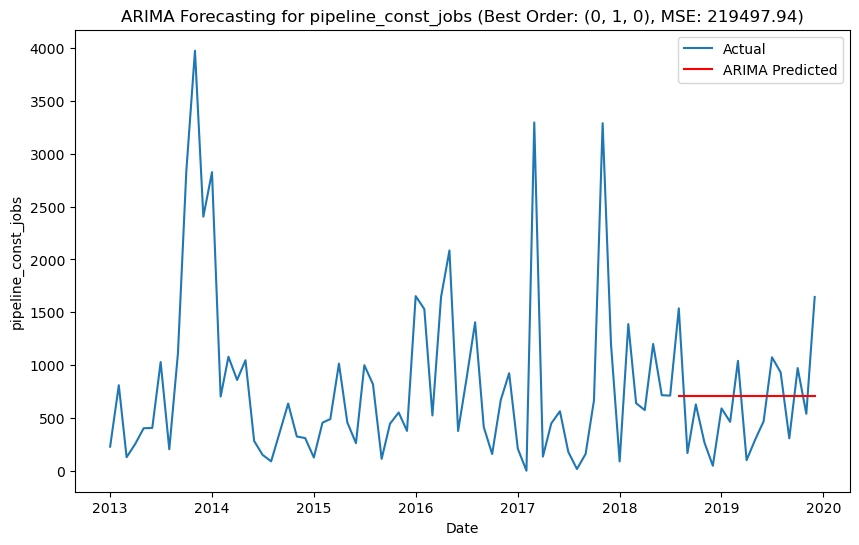

1/1 [==============================] - 0s 7ms/step
Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.0901
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0849
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0800
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0754
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0709
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0667
Epoch 7/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0629
Epoch 8/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0594
Epoch 9/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0563
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0538
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0520
Epoch 12/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0510
Epoch 13/50
1/1 [======

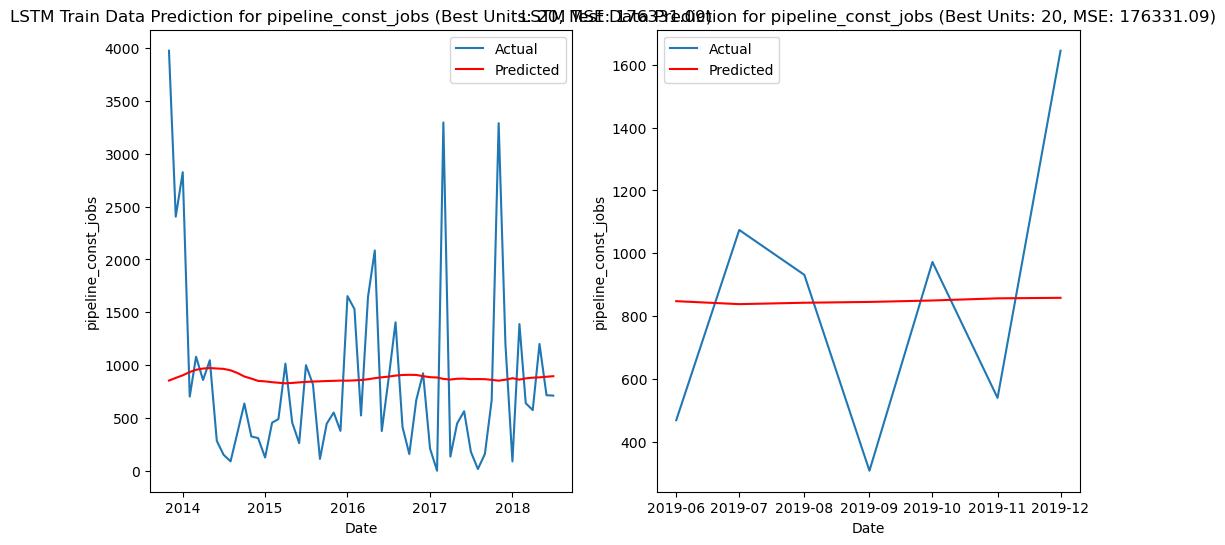

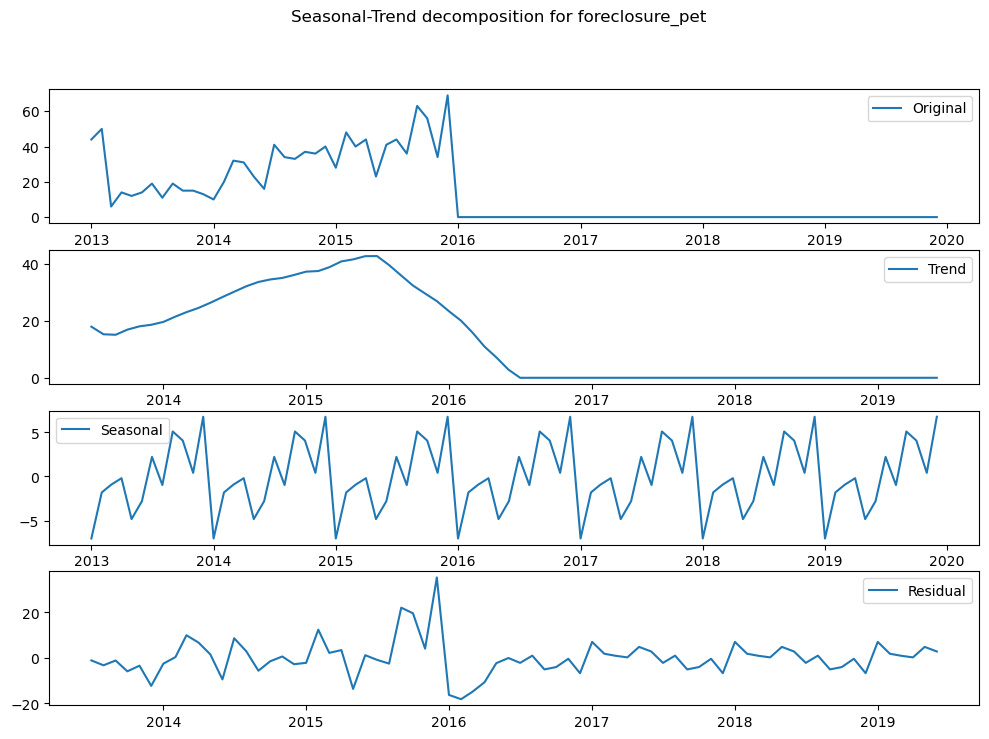

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

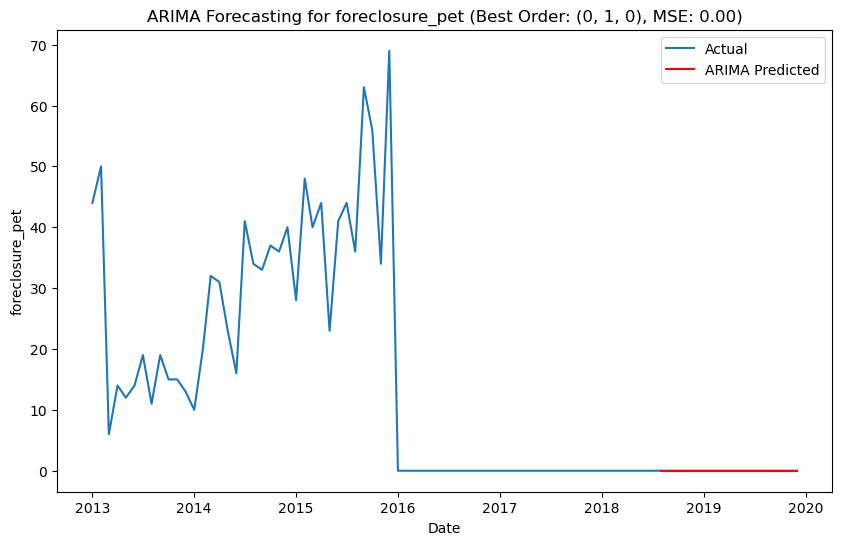

1/1 [==============================] - 0s 7ms/step
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.1356
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 0.1182
Epoch 3/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1028
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0886
Epoch 5/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0761
Epoch 6/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0662
Epoch 7/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0608
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0620
Epoch 9/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0675
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0699
Epoch 11/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0673
Epoch 12/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0629
Epoch 13/50
1/1 [=====

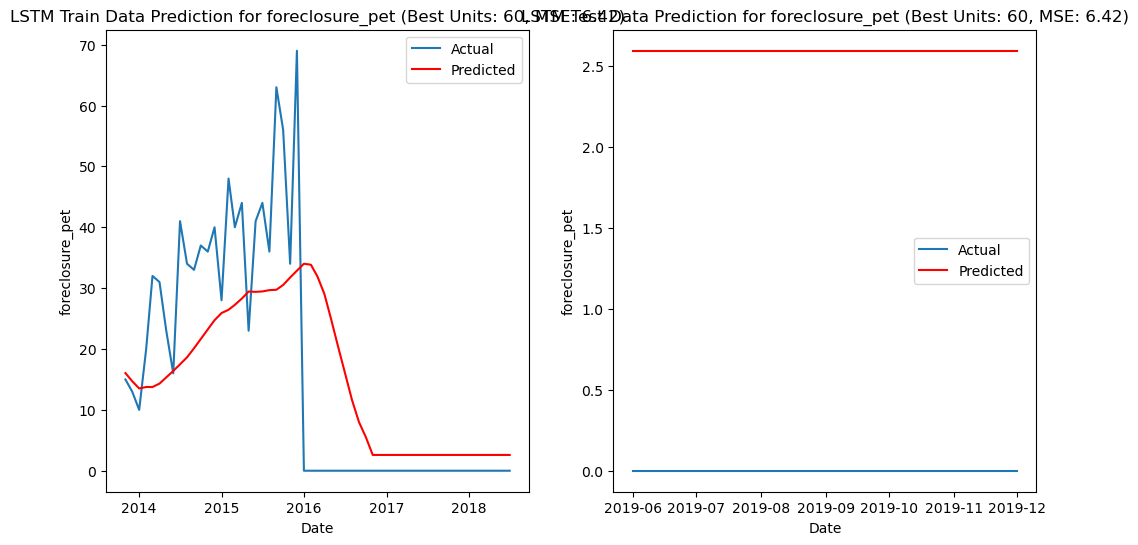

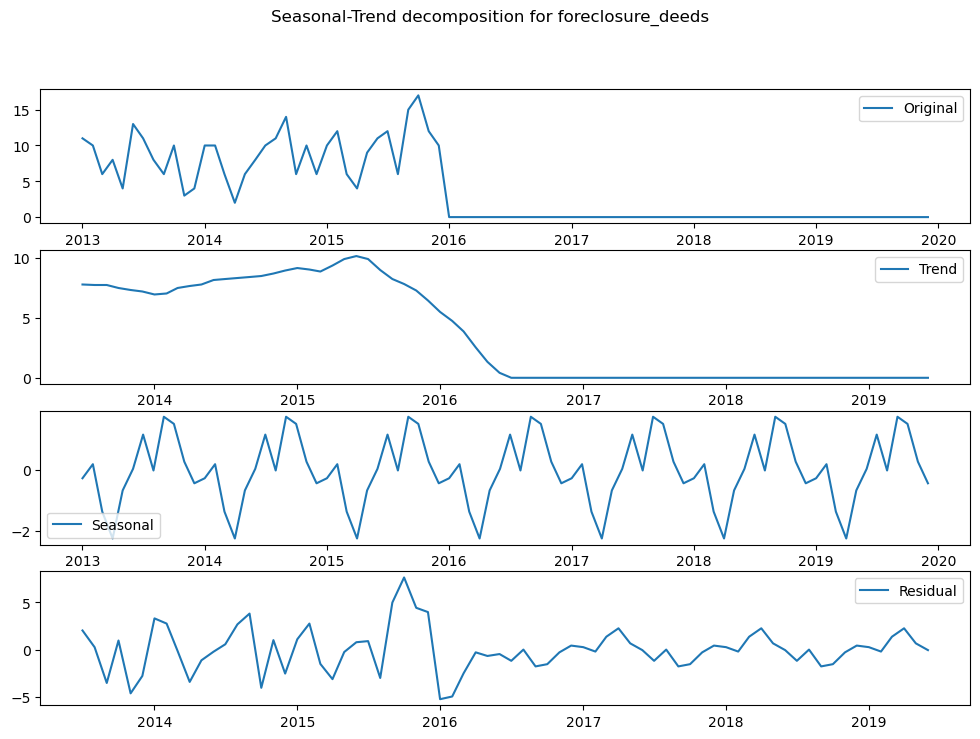

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

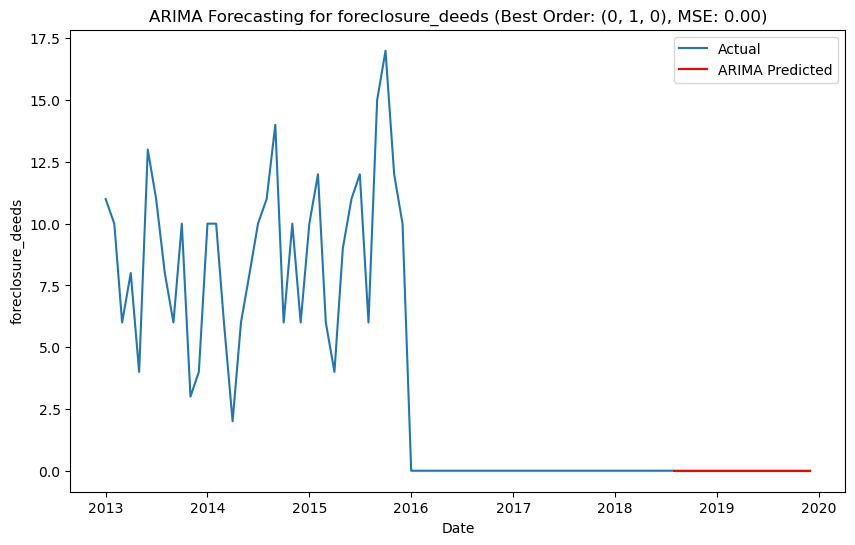

1/1 [==============================] - 0s 7ms/step
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.1419
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1267
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 0.1127
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0997
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0879
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0778
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0701
Epoch 8/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0659
Epoch 9/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0660
Epoch 10/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0696
Epoch 11/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0732
Epoch 12/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0738
Epoch 13/50
1/1 [======

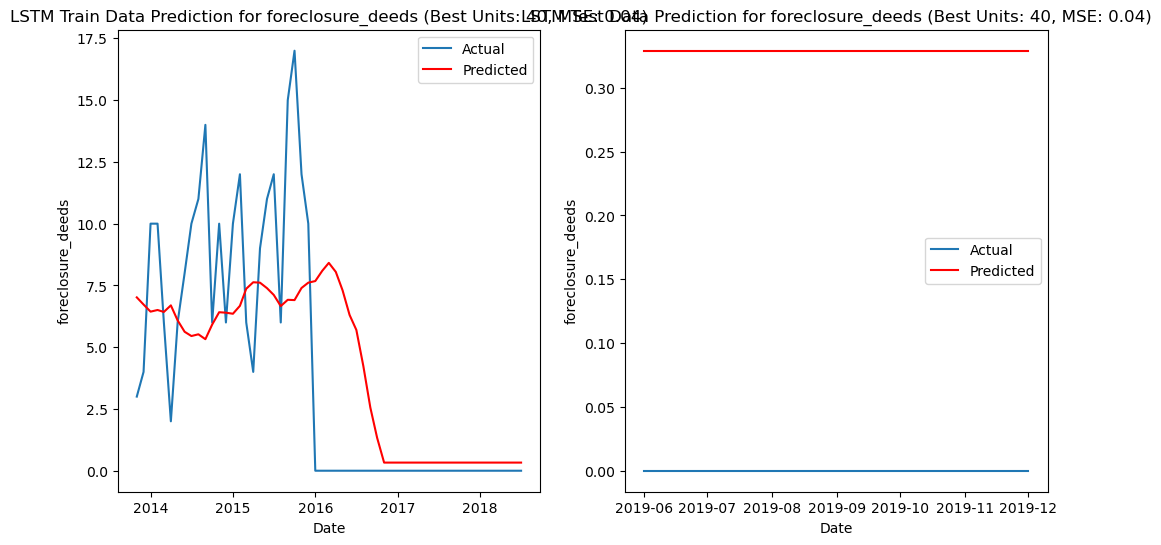

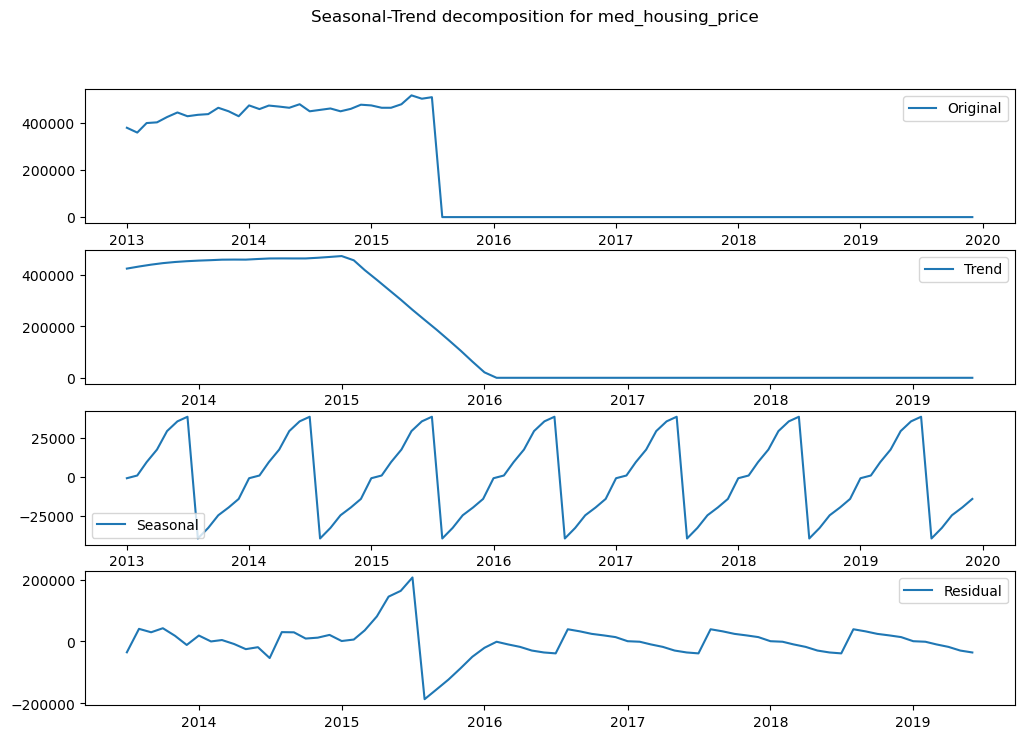

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

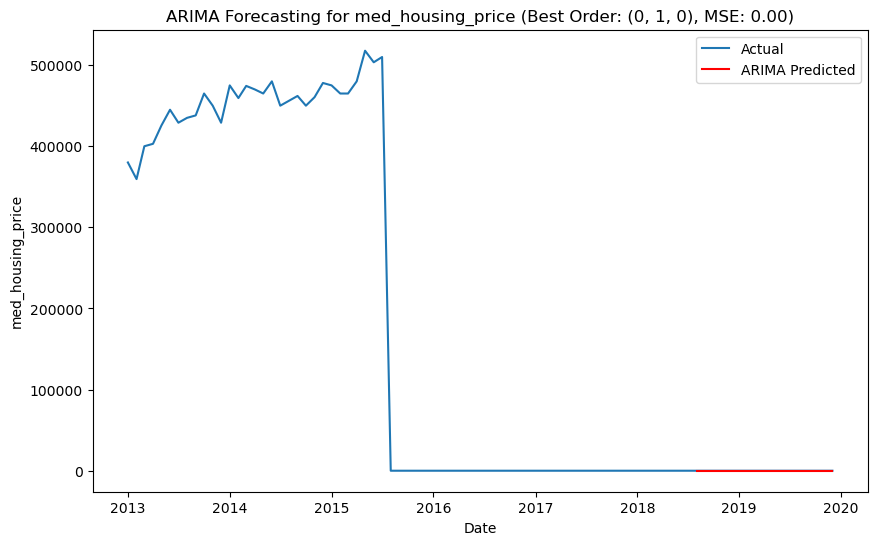

1/1 [==============================] - 0s 8ms/step
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.3165
Epoch 2/50
1/1 [==============================] - 0s 12ms/step - loss: 0.2535
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 0.1988
Epoch 4/50
1/1 [==============================] - 0s 10ms/step - loss: 0.1476
Epoch 5/50
1/1 [==============================] - 0s 12ms/step - loss: 0.1036
Epoch 6/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0823
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 0.1056
Epoch 8/50
1/1 [==============================] - 0s 11ms/step - loss: 0.1188
Epoch 9/50
1/1 [==============================] - 0s 11ms/step - loss: 0.1009
Epoch 10/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0820
Epoch 11/50
1/1 [==============================] - 0s 15ms/step - loss: 0.0757
Epoch 12/50
1/1 [==============================] - 0s 15ms/step - loss: 0.0790
Epoch 13/50


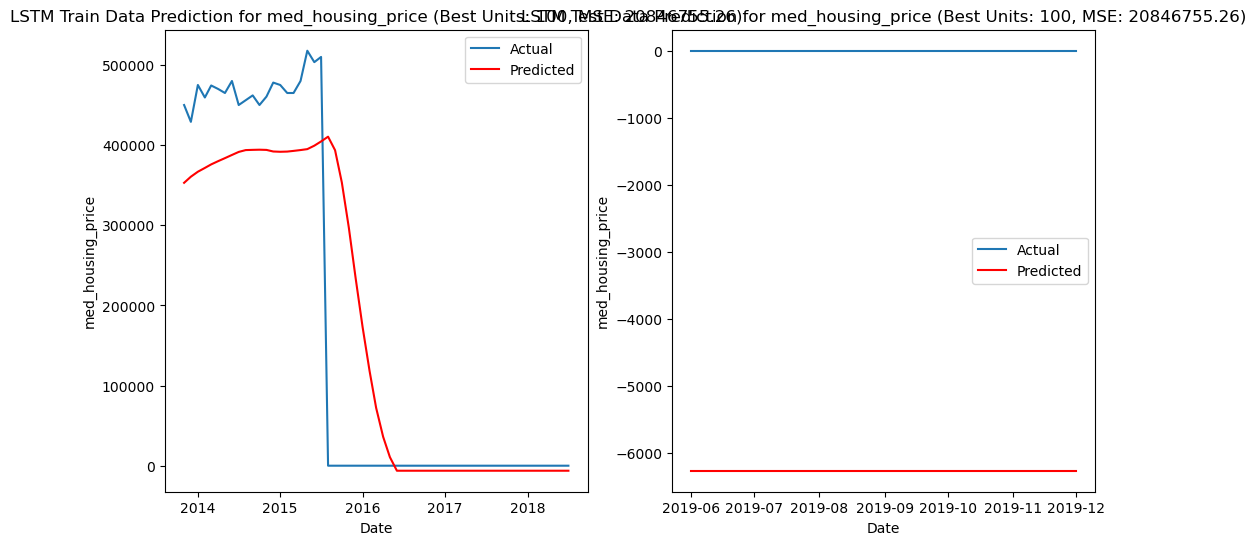

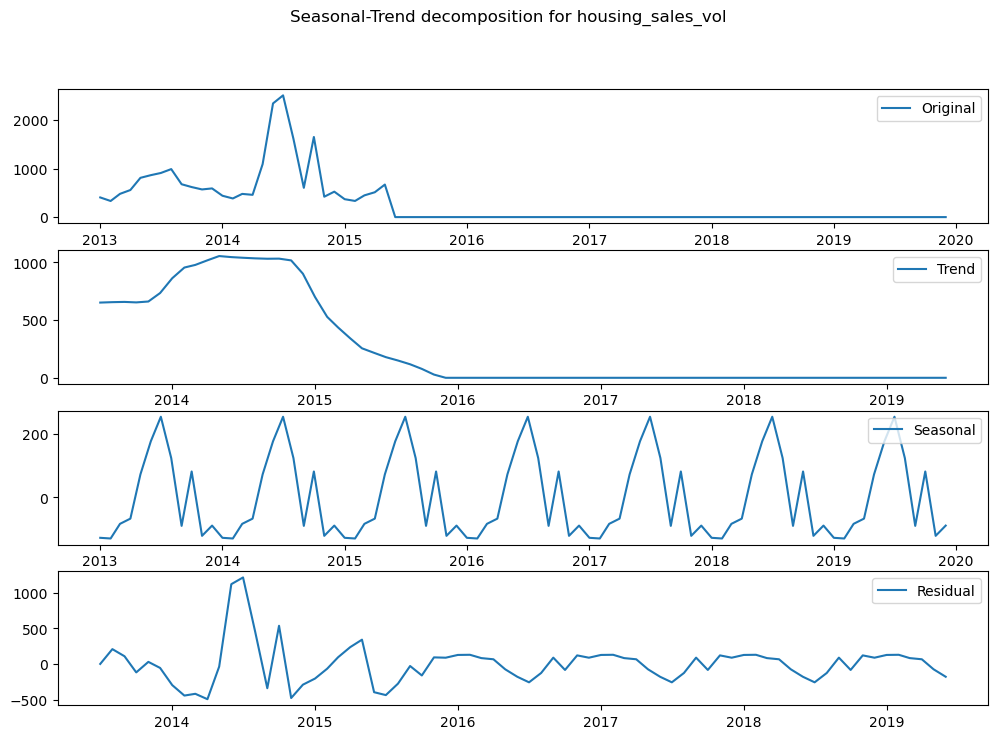

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/bhanuprasadthota/anaconda3/lib/python3.11/si

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/ts

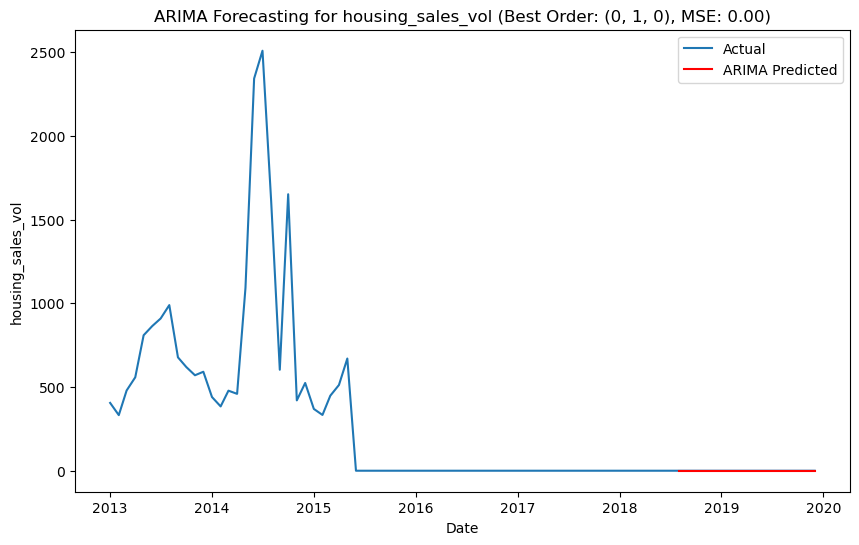

1/1 [==============================] - 0s 7ms/step
Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.0591
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0537
Epoch 3/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0491
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0451
Epoch 5/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0422
Epoch 6/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0407
Epoch 7/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0408
Epoch 8/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0417
Epoch 9/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0420
Epoch 10/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0413
Epoch 11/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0399
Epoch 12/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0386
Epoch 13/50
1/1 [======

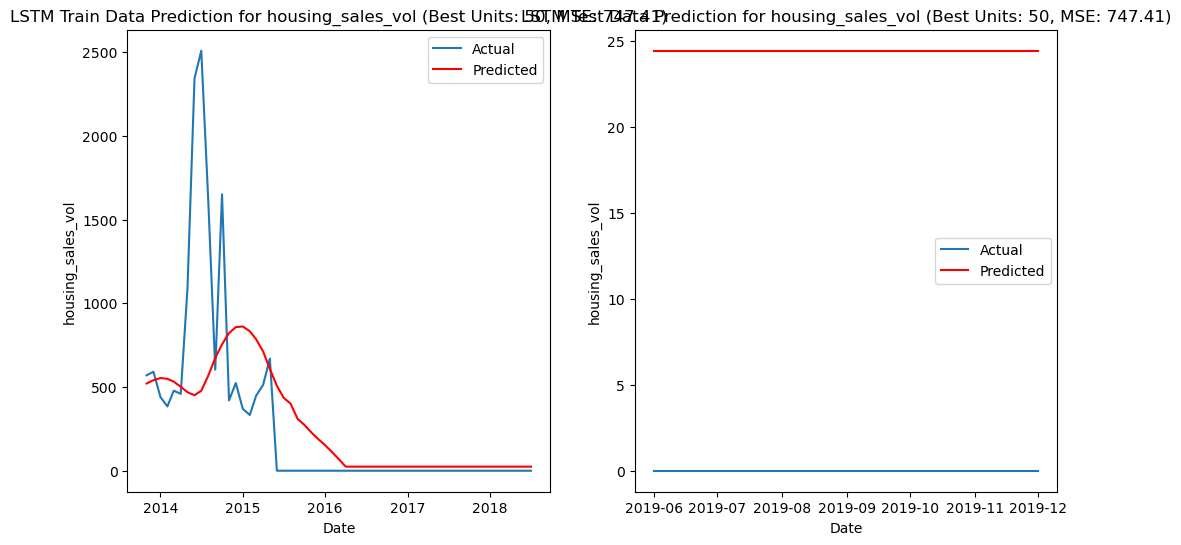

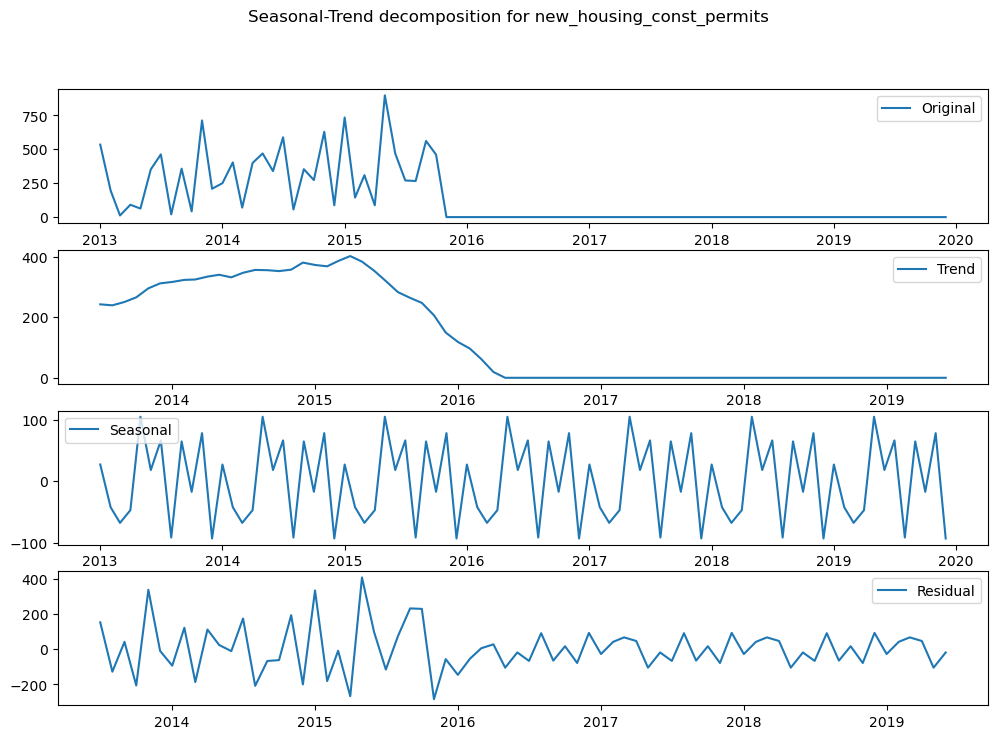

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

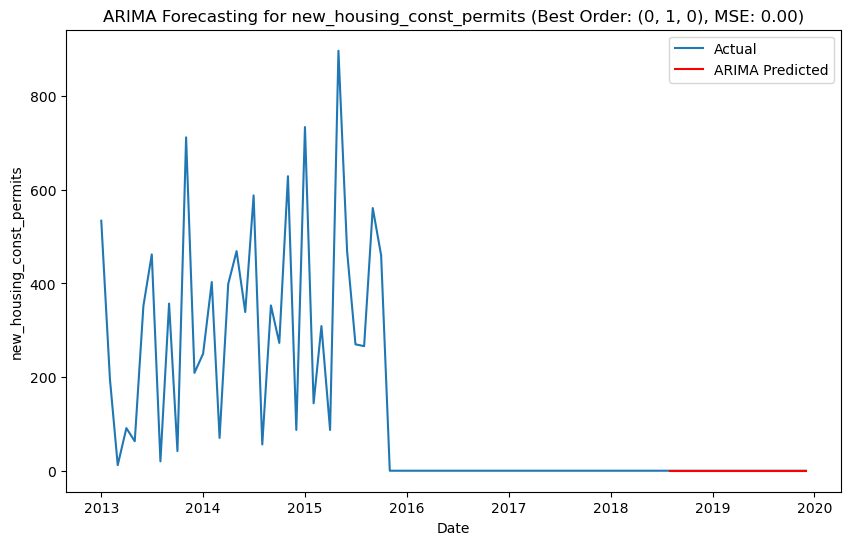

1/1 [==============================] - 0s 7ms/step
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.0968
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0928
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0890
Epoch 4/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0852
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0816
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0780
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0745
Epoch 8/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0712
Epoch 9/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0680
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0651
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0626
Epoch 12/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0604
Epoch 13/50
1/1 [======

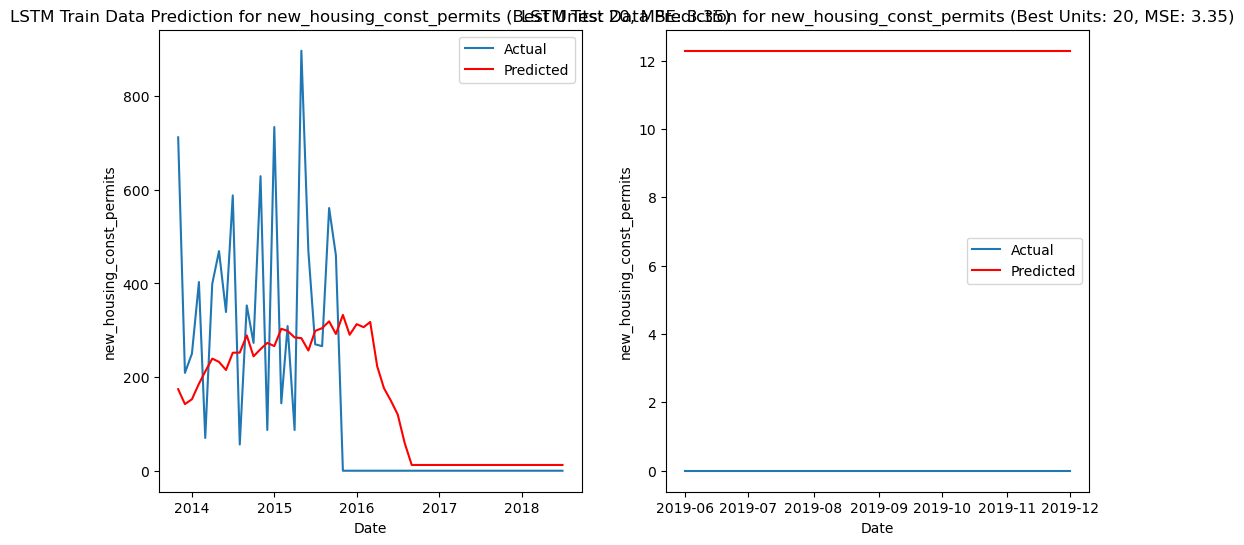

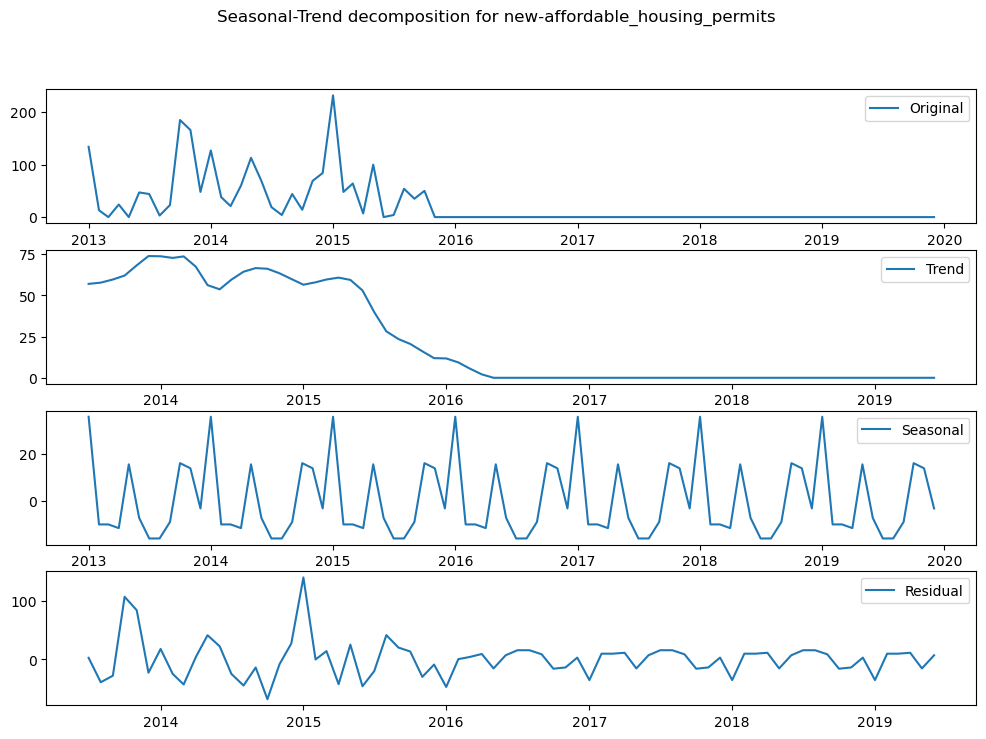

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/bhanuprasadthota/anaconda3/lib/python3.11/si

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/bhanuprasadthota

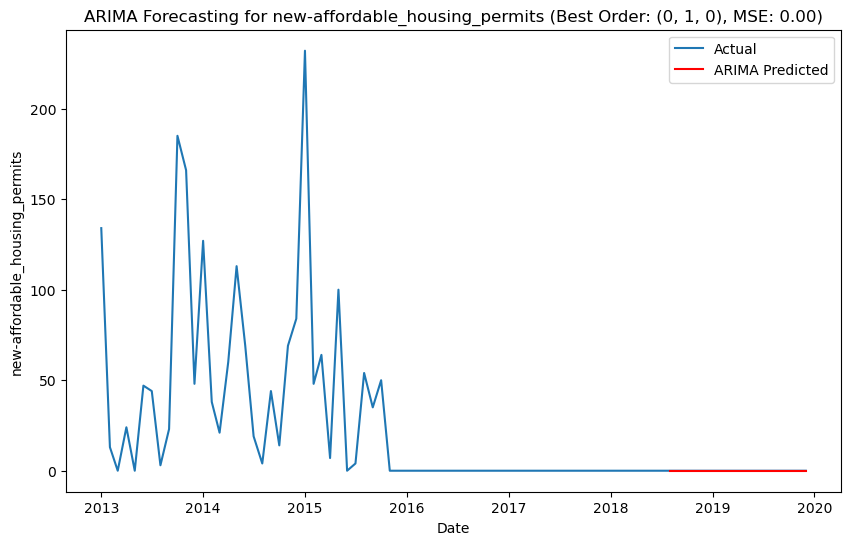

1/1 [==============================] - 0s 8ms/step
Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.0522
Epoch 2/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0445
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0388
Epoch 4/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0353
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0350
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0368
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0365
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0348
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0334
Epoch 10/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0330
Epoch 11/50
1/1 [==============================] - 0s 14ms/step - loss: 0.0333
Epoch 12/50
1/1 [==============================] - 0s 13ms/step - loss: 0.0337
Epoch 13/50


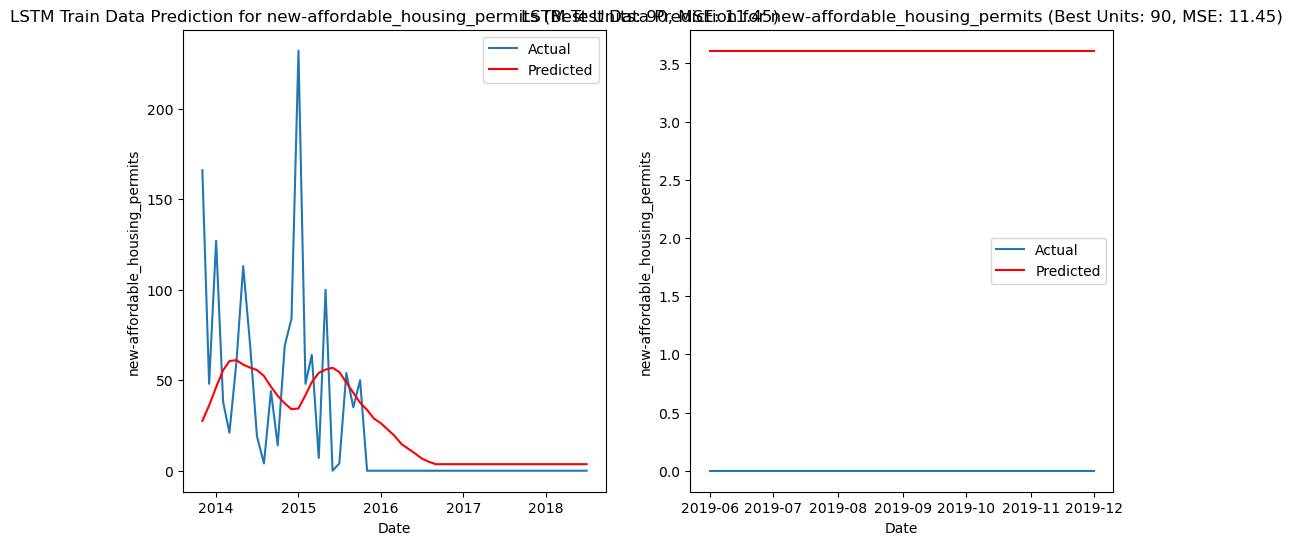

In [7]:
# Time Series Analysis
for col in data.select_dtypes(include=[np.number]).columns:
    if col not in ['Year', 'Month']:
        # Assuming 'Year' and 'Month' are in datetime format
        data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
        data.set_index('Date', inplace=True)

        # Seasonal-Trend decomposition using LOESS (STL)
        result = seasonal_decompose(data[col], period=12)
        seasonal = result.seasonal
        trend = result.trend
        residual = result.resid

        plt.figure(figsize=(12, 8))
        plt.subplot(4, 1, 1)
        plt.plot(data[col], label='Original')
        plt.legend()
        plt.subplot(4, 1, 2)
        plt.plot(trend, label='Trend')
        plt.legend()
        plt.subplot(4, 1, 3)
        plt.plot(seasonal, label='Seasonal')
        plt.legend()
        plt.subplot(4, 1, 4)
        plt.plot(residual, label='Residual')
        plt.legend()
        plt.suptitle(f'Seasonal-Trend decomposition for {col}')
        plt.show()

        # Autoregressive Integrated Moving Average (ARIMA) with parameter tuning
        train_size = int(len(data) * 0.8)
        train, test = data[col][:train_size], data[col][train_size:]

        # Parameter tuning for ARIMA order
        best_mse = float('inf')
        best_order = None

        for p in range(5):
            for d in range(2):
                for q in range(5):
                    try:
                        model = ARIMA(train, order=(p, d, q))
                        model_fit = model.fit()
                        predictions = model_fit.forecast(steps=len(test))
                        mse = mean_squared_error(test, predictions)

                        if mse < best_mse:
                            best_mse = mse
                            best_order = (p, d, q)

                    except:
                        continue

        # Use the best order for ARIMA
        model = ARIMA(train, order=best_order)
        model_fit = model.fit()
        predictions_arima = model_fit.forecast(steps=len(test))

        plt.figure(figsize=(10, 6))
        plt.plot(data.index, data[col], label='Actual')
        plt.plot(test.index, predictions_arima, label='ARIMA Predicted', color='red')
        plt.title(f'ARIMA Forecasting for {col} (Best Order: {best_order}, MSE: {best_mse:.2f})')
        plt.xlabel('Date')
        plt.ylabel(col)
        plt.legend()
        plt.show()

        # Long Short-Term Memory (LSTM) networks with parameter tuning
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(np.array(data[col]).reshape(-1, 1))

        train_size = int(len(scaled_data) * 0.8)
        train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

        def create_dataset(dataset, time_step=1):
            dataX, dataY = [], []
            for i in range(len(dataset) - time_step):
                a = dataset[i:(i + time_step), 0]
                dataX.append(a)
                dataY.append(dataset[i + time_step, 0])
            return np.array(dataX), np.array(dataY)

        time_step = 10
        X_train, y_train = create_dataset(train_data, time_step)
        X_test, y_test = create_dataset(test_data, time_step)

        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

        # Parameter tuning for LSTM units
        best_mse_lstm = float('inf')
        best_units_lstm = None

        for units in range(10, 101, 10):
            model = Sequential()
            model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
            model.add(LSTM(units=units, return_sequences=True))
            model.add(LSTM(units=units))
            model.add(Dense(units=1))
            model.compile(optimizer='adam', loss='mean_squared_error')
            model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

            train_predict = model.predict(X_train)
            test_predict = model.predict(X_test)

            train_predict = scaler.inverse_transform(train_predict)
            test_predict = scaler.inverse_transform(test_predict)

            mse_lstm_train = mean_squared_error(scaler.inverse_transform(y_train.reshape(-1, 1)), train_predict)
            mse_lstm_test = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), test_predict)

            if mse_lstm_test < best_mse_lstm:
                best_mse_lstm = mse_lstm_test
                best_units_lstm = units

        # Use the best units for LSTM
        model = Sequential()
        model.add(LSTM(units=best_units_lstm, return_sequences=True, input_shape=(X_train.shape[1], 1)))
        model.add(LSTM(units=best_units_lstm, return_sequences=True))
        model.add(LSTM(units=best_units_lstm))
        model.add(Dense(units=1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X_train, y_train, epochs=50, batch_size=64)

        train_predict = model.predict(X_train)
        test_predict = model.predict(X_test)

        train_predict = scaler.inverse_transform(train_predict)
        test_predict = scaler.inverse_transform(test_predict)

        # Visualize the results for LSTM
        plt.figure(figsize=(12, 6))

        # Train data prediction
        plt.subplot(1, 2, 1)
        plt.plot(data.index[:train_size][-len(train_predict):],
                 scaler.inverse_transform(y_train.reshape(-1, 1)), label='Actual')
        plt.plot(data.index[:train_size][-len(train_predict):], train_predict, label='Predicted', color='red')
        plt.title(f'LSTM Train Data Prediction for {col} (Best Units: {best_units_lstm}, MSE: {best_mse_lstm:.2f})')
        plt.xlabel('Date')
        plt.ylabel(col)
        plt.legend()

        # Test data prediction
        plt.subplot(1, 2, 2)
        plt.plot(data.index[train_size:][-len(test_predict):],
                 scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
        plt.plot(data.index[train_size:][-len(test_predict):], test_predict, label='Predicted', color='red')
        plt.title(f'LSTM Test Data Prediction for {col} (Best Units: {best_units_lstm}, MSE: {best_mse_lstm:.2f})')
        plt.xlabel('Date')
        plt.ylabel(col)
        plt.legend()

        plt.show()

In [11]:
# Define columns to analyze
columns_to_analyze = [
    'hotel_occup_rate', 'hotel_avg_daily_rate',
    'total_jobs', 'unemp_rate', 'labor_force_part_rate',
    'pipeline_unit', 'pipeline_total_dev_cost', 'pipeline_sqft', 'pipeline_const_jobs',
    'foreclosure_pet', 'foreclosure_deeds', 'med_housing_price', 'housing_sales_vol',
    'new_housing_const_permits', 'new-affordable_housing_permits'
]

In [12]:
# Select relevant columns from the dataset
selected_data = data[columns_to_analyze]

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bhanuprasadthota/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

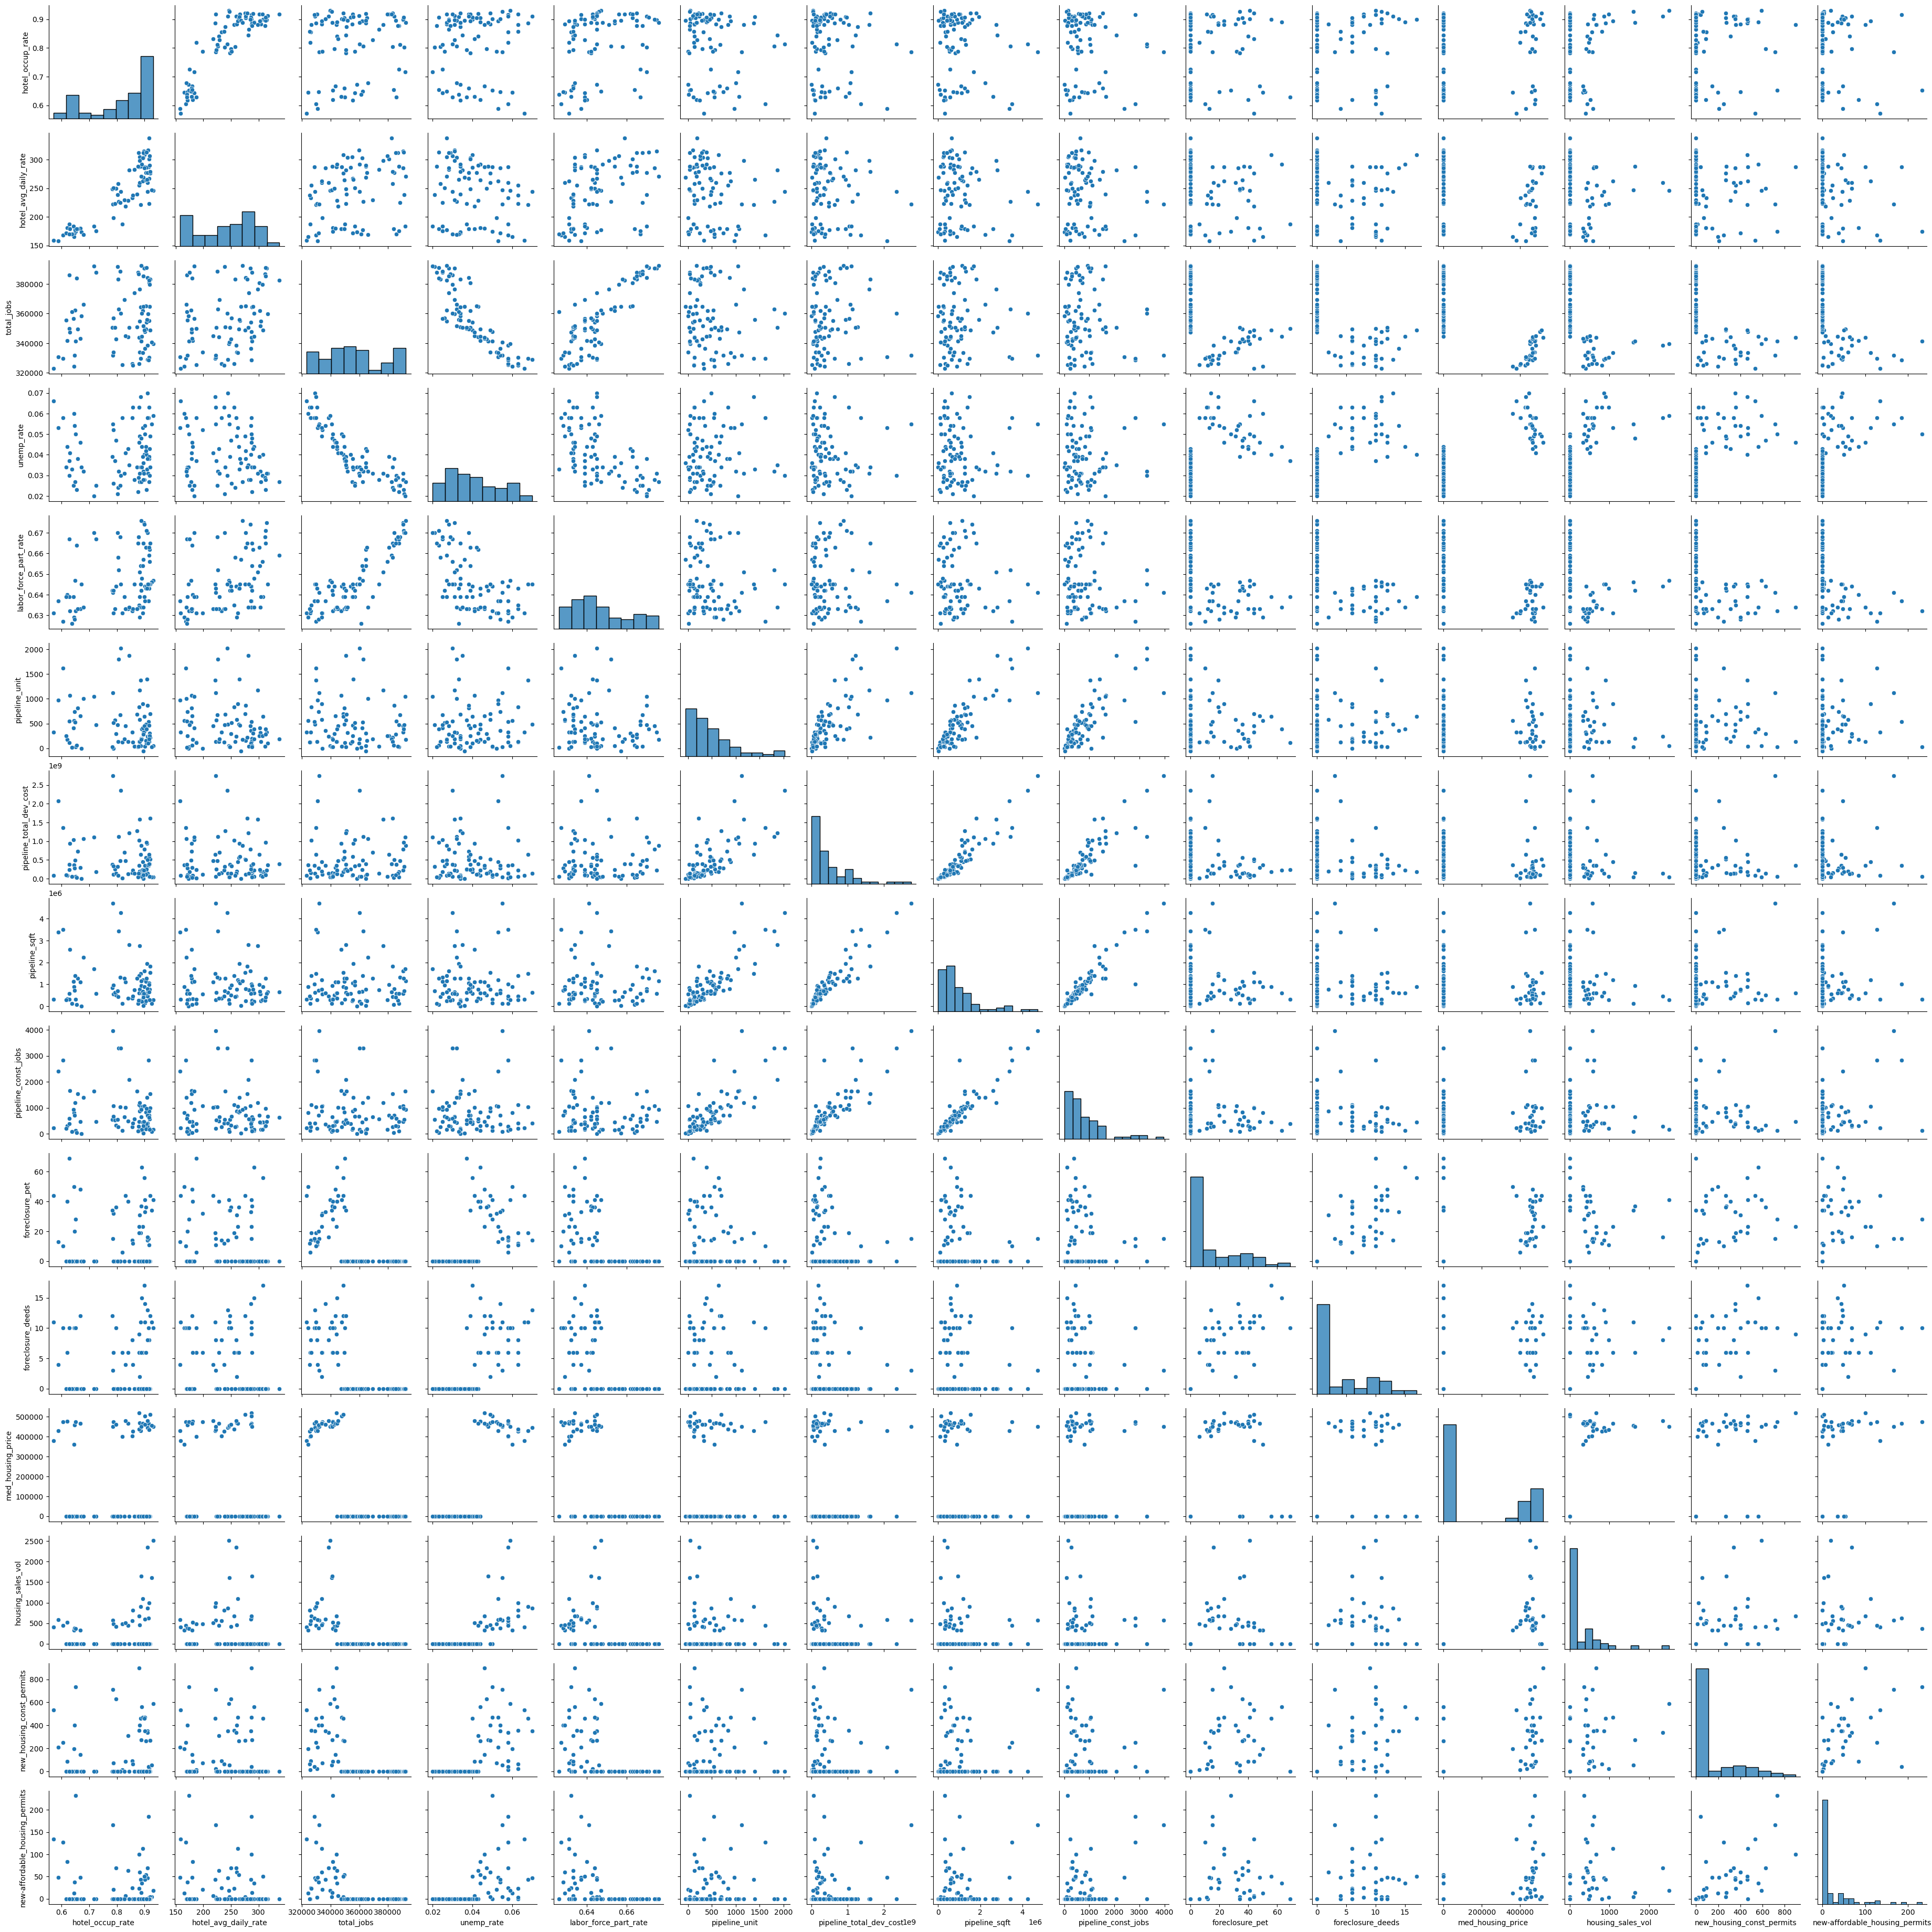

In [16]:
import seaborn as sns
# Plot pairplots for scatter plots
sns.pairplot(selected_data)
plt.show()

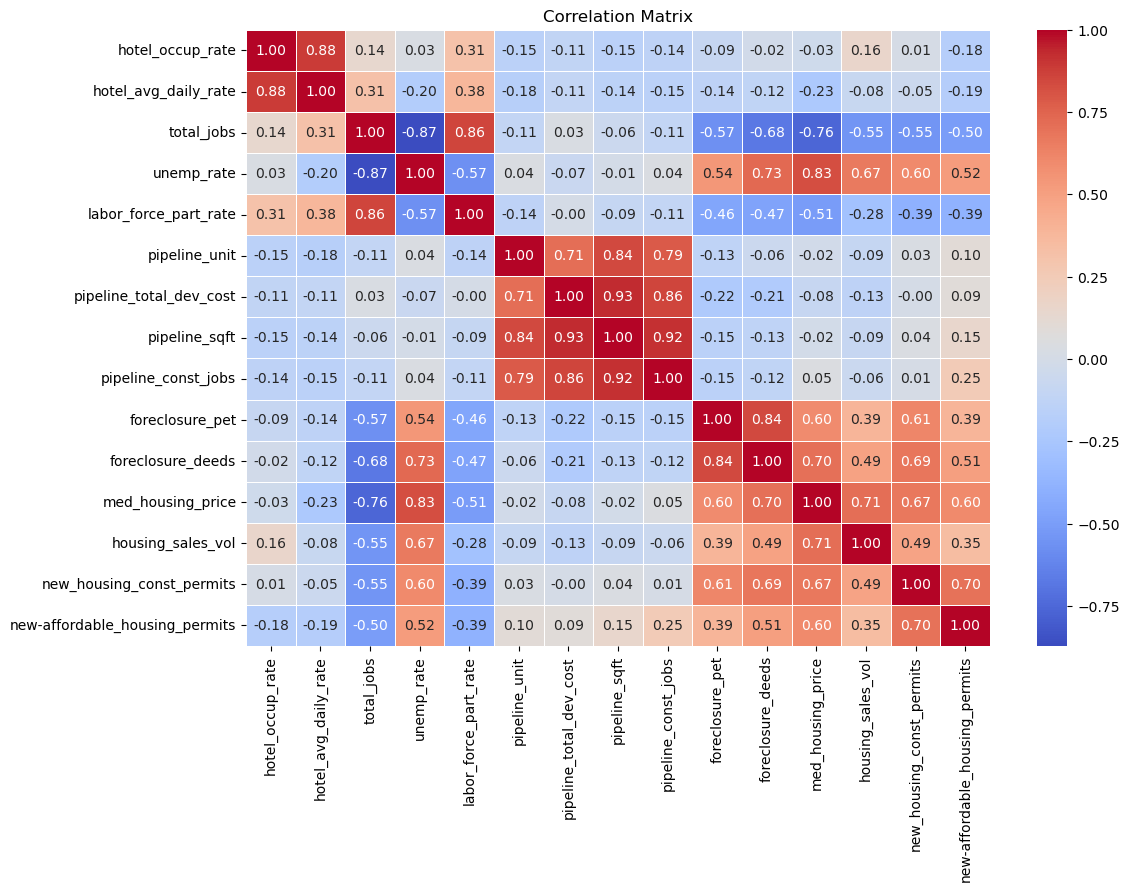

In [18]:
# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Plot heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Set correlation threshold 
correlation_threshold = 0.75

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Extract correlations above the threshold
high_correlations = (correlation_matrix[(correlation_matrix > correlation_threshold) & (correlation_matrix < 1)])
high_correlations = high_correlations.dropna(how='all', axis=1).dropna(how='all', axis=0)

# Print the high correlation values along with column names
print("High Correlation Values:")
for column in high_correlations.columns:
    for index in high_correlations.index:
        if not pd.isnull(high_correlations.at[index, column]):
            print(f"{index} - {column}: {high_correlations.at[index, column]:.2f}")

High Correlation Values:
hotel_avg_daily_rate - hotel_occup_rate: 0.88
hotel_occup_rate - hotel_avg_daily_rate: 0.88
labor_force_part_rate - total_jobs: 0.86
med_housing_price - unemp_rate: 0.83
total_jobs - labor_force_part_rate: 0.86
pipeline_sqft - pipeline_unit: 0.84
pipeline_const_jobs - pipeline_unit: 0.79
pipeline_sqft - pipeline_total_dev_cost: 0.93
pipeline_const_jobs - pipeline_total_dev_cost: 0.86
pipeline_unit - pipeline_sqft: 0.84
pipeline_total_dev_cost - pipeline_sqft: 0.93
pipeline_const_jobs - pipeline_sqft: 0.92
pipeline_unit - pipeline_const_jobs: 0.79
pipeline_total_dev_cost - pipeline_const_jobs: 0.86
pipeline_sqft - pipeline_const_jobs: 0.92
foreclosure_deeds - foreclosure_pet: 0.84
foreclosure_pet - foreclosure_deeds: 0.84
unemp_rate - med_housing_price: 0.83


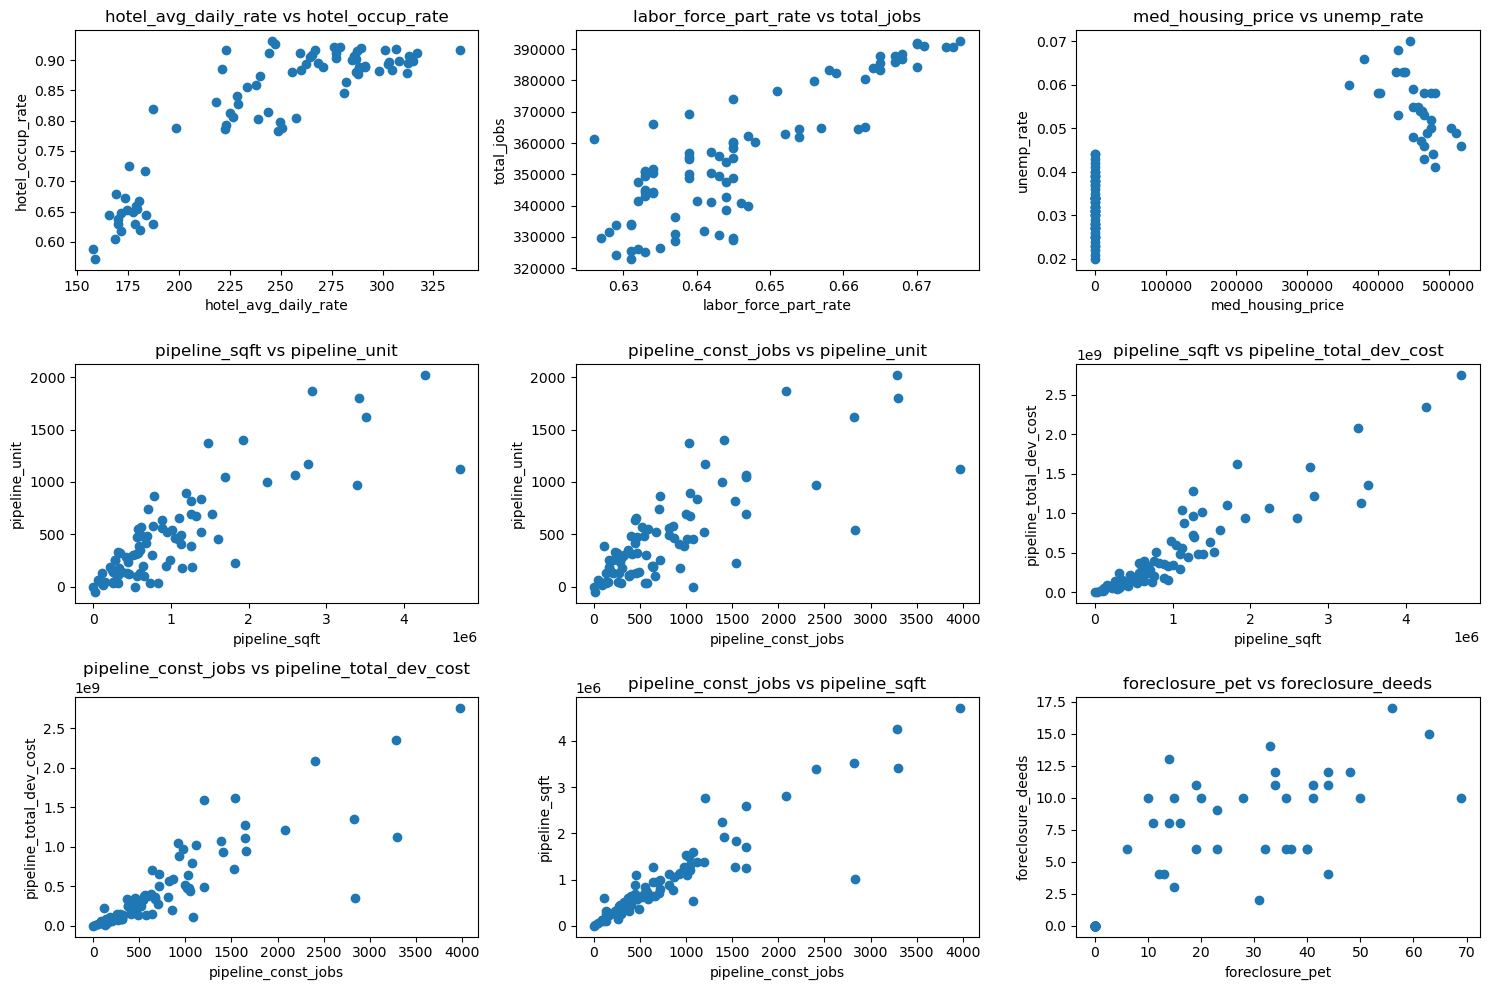

In [21]:
# List of paired columns with high correlation
paired_columns = [
    ('hotel_avg_daily_rate', 'hotel_occup_rate'),
    ('labor_force_part_rate', 'total_jobs'),
    ('med_housing_price', 'unemp_rate'),
    ('pipeline_sqft', 'pipeline_unit'),
    ('pipeline_const_jobs', 'pipeline_unit'),
    ('pipeline_sqft', 'pipeline_total_dev_cost'),
    ('pipeline_const_jobs', 'pipeline_total_dev_cost'),
    ('pipeline_const_jobs', 'pipeline_sqft'),
    ('foreclosure_pet', 'foreclosure_deeds')
]

# Plot scatter plots for each pair
plt.figure(figsize=(15, 10))

for i, (col1, col2) in enumerate(paired_columns, start=1):
    plt.subplot(3, 3, i)
    plt.scatter(data[col1], data[col2])
    plt.title(f"{col1} vs {col2}")
    plt.xlabel(col1)
    plt.ylabel(col2)

plt.tight_layout()
plt.show()
